In [1]:
# Importing the necessary packages

import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim

import random
import math

import matplotlib.animation as animation

ModuleNotFoundError: No module named 'torch'

In [20]:
# %%html
# <style>
# .output_wrapper, .output {
#     height:auto !important;
#     max-height:100px;  /* your desired max-height here */
# }
# .output_scroll {
#     box-shadow:none !important;
#     webkit-box-shadow:none !important;
# }
# </style>

In [41]:
init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example2_rk4, y0, t)
    label_list.append(label)
x = torch.FloatTensor(label_list[:-1])
y = torch.FloatTensor(label_list[1:])

print(x.tolist()[1])
print(y.tolist()[1])

[[-16.077777862548828, -9.0], [-16.800779342651367, -2.5854299068450928], [-17.01059341430664, -0.7539824843406677], [-17.073705673217773, -0.23105452954769135], [-17.09491729736328, -0.08175620436668396], [-17.104162216186523, -0.03914031386375427], [-17.109994888305664, -0.026984762400388718], [-17.114856719970703, -0.0235260222107172], [-17.11944007873535, -0.022550085559487343], [-17.12394905090332, -0.02228272147476673], [-17.12843894958496, -0.02221735566854477], [-17.132925033569336, -0.022209350019693375], [-17.137413024902344, -0.022217407822608948], [-17.14190101623535, -0.022229742258787155], [-17.146394729614258, -0.02224298007786274], [-17.150888442993164, -0.022256163880228996], [-17.155385971069336, -0.02226901426911354], [-17.15988540649414, -0.022281453013420105], [-17.16438865661621, -0.02229345589876175], [-17.168893814086914, -0.022305017337203026], [-17.17340087890625, -0.022316131740808487], [-17.17790985107422, -0.022326797246932983], [-17.182422637939453, -0.022

[[1.5        0.        ]
 [1.499001   0.002999  ]
 [1.498006   0.00599001]
 ...
 [2.25722555 1.44900778]
 [2.26064647 1.45062763]
 [2.2640775  1.4522511 ]]


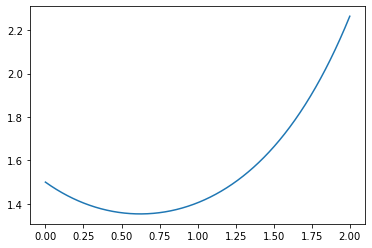

In [68]:
# Runge–Kutta methods

def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def diff_eqs_example2_rk4(y, t):
    return np.array([y[0]+y[1]-2, y[0]-y[1]])

y0 = np.array([1.5, 0])
t = np.linspace(0, 2, 1000)
sol4 = rungekutta4(diff_eqs_example2_rk4, y0, t)
print(sol4)
x = []
y = []
for i in sol4:
    x.append(i[0])
    y.append(i[1])
# plt.plot(x, y)
plt.plot(t, x)
# plt.plot(t, y)

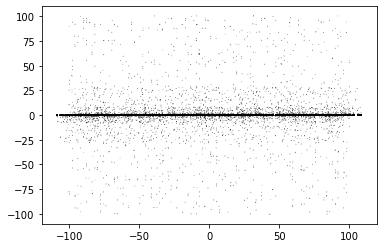

In [45]:
init_1 = random.choices(population=np.linspace(-100, 100, 100), k=1000)
init_2 = random.choices(population=np.linspace(-100, 100, 100), k=1000)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example2_rk4, y0, t)
    label_list.append(label)
x = torch.FloatTensor(label_list[:-2])
y = torch.FloatTensor(label_list[2:])

# x = x.tolist()[0]
# y = y.tolist()[0]

a = []
b = []
u = []
v = []

for xi in x.tolist():
    for i in xi:
        a.append(i[0])
        b.append(i[1]) 
for yi in y.tolist():
    for j in yi:
        u.append(j[0])
        v.append(j[1])

plt.quiver(a,b,u,v)

In [6]:
t = np.linspace(0, 0.1, 100)

def diff_eqs_example2_odeint(d_list, t):
    x1, x2 = d_list
    return np.array([x1+x2-2, x1-x2])

result = odeint(diff_eqs_example2_odeint, [2.5, 3.5], t)
print(result)

[[2.5        3.5       ]
 [2.50404194 3.49899245]
 [2.50808694 3.49799   ]
 [2.51213503 3.49699264]
 [2.5161862  3.49600039]
 [2.52024046 3.49501322]
 [2.52429782 3.49403115]
 [2.52835829 3.49305417]
 [2.53242187 3.49208227]
 [2.53648859 3.49111546]
 [2.54055844 3.49015374]
 [2.54463143 3.48919709]
 [2.54870757 3.48824553]
 [2.55278688 3.48729904]
 [2.55686936 3.48635763]
 [2.56095501 3.48542129]
 [2.56504385 3.48449002]
 [2.56913589 3.48356382]
 [2.57323113 3.48264269]
 [2.57732958 3.48172663]
 [2.58143125 3.48081563]
 [2.58553614 3.47990969]
 [2.58964427 3.47900881]
 [2.59375565 3.478113  ]
 [2.59787027 3.47722224]
 [2.60198816 3.47633653]
 [2.60610932 3.47545588]
 [2.61023375 3.47458027]
 [2.61436147 3.47370972]
 [2.61849248 3.47284422]
 [2.6226268  3.47198376]
 [2.62676443 3.47112835]
 [2.63090537 3.47027797]
 [2.63504965 3.46943264]
 [2.63919726 3.46859235]
 [2.64334822 3.4677571 ]
 [2.64750253 3.46692688]
 [2.6516602  3.4661017 ]
 [2.65582124 3.46528155]
 [2.65998567 3.46446643]


In [7]:
init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=1000)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=1000)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

[[-40.344444274902344, -31.244443893432617],
 [-6.97777795791626, -77.75555419921875],
 [-31.244443893432617, -83.82221984863281],
 [-40.344444274902344, -84.83333587646484],
 [-12.033333778381348, -76.74444580078125],
 [-89.88888549804688, -22.14444351196289],
 [-19.11111068725586, -72.69999694824219],
 [-59.55555725097656, -2.933333396911621],
 [-93.93333435058594, -68.65555572509766],
 [-93.93333435058594, -72.69999694824219],
 [-51.46666717529297, -16.077777862548828],
 [-75.73332977294922, -88.87777709960938],
 [-73.71111297607422, -57.53333282470703],
 [-25.177778244018555, -90.9000015258789],
 [-64.61111450195312, -47.42222213745117],
 [-64.61111450195312, -63.599998474121094],
 [-59.55555725097656, -46.411109924316406],
 [-25.177778244018555, -7.988888740539551],
 [-22.14444351196289, -78.76667022705078],
 [-29.22222137451172, -51.46666717529297],
 [-78.76667022705078, -74.72222137451172],
 [-53.488887786865234, -58.5444450378418],
 [-65.62222290039062, -86.85555267333984],
 [-

[7.998641969254996e+25, 7.981221786488988e+25, 7.964873359553663e+25, 7.9607283761603e+25, 7.954572697662904e+25, 7.956196933478594e+25, 7.952419962629502e+25, 7.949290472497397e+25, 7.950002516818642e+25, 7.949287705485786e+25, 7.9478645391805e+25, 7.94138050863859e+25, 7.943217804348332e+25, 7.939621611591162e+25, 7.94135283852248e+25, 7.945619570426729e+25, 7.936959746421326e+25, 7.944446357503641e+25, 7.938405048819501e+25, 7.939015636048341e+25, 7.945546705787638e+25, 7.93741630333715e+25, 7.936968969793363e+25, 7.937342516360855e+25, 7.934061762927346e+25, 7.933481612826228e+25, 7.935402841221505e+25, 7.936523480923983e+25, 7.934700020272297e+25, 7.936614792307148e+25]


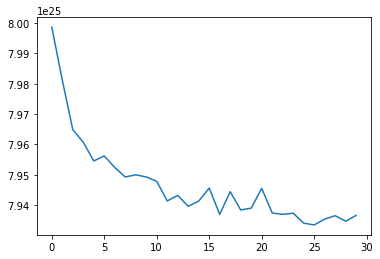

In [113]:
init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example2_rk4, y0, t)
    label_list.append(label)
x = torch.FloatTensor(label_list[:-1])
y = torch.FloatTensor(label_list[1:])

# rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
# linear = nn.Linear(1024, 2)
# h0 = torch.zeros(6, 199, 512)
# out = rnn(x, h0)[0]
# print(out.size())
# out = linear(out)
# print(out.size())
# out = out + x
# print(out.size())
# criterion = nn.MSELoss()
# print("="*50)
# print(out.size())
# print(y.size())
# criterion(output, y)

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
        self.linear = nn.Linear(1024, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 199, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

num_epochs = 30
list_of_loss = []
for epoch in range(0, num_epochs):
    output, h0 = model(x, h0)
    h0 = h0.detach()
    loss = criterion(output, y)
    list_of_loss.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
print(list_of_loss)
px = list(range(0, num_epochs))
plt.plot(px, list_of_loss)

[7.4163603468591134e+25, 7.397039688284912e+25, 7.39027203905287e+25, 7.3819502516326175e+25, 7.376561035351483e+25, 7.368805562974294e+25, 7.376309698463479e+25, 7.368436166924218e+25, 7.370754461485681e+25, 7.367753637393491e+25, 7.355739734146885e+25, 7.363549624419092e+25, 7.359161144003957e+25, 7.358312132607964e+25, 7.359712701651761e+25, 7.356437943410075e+25, 7.357958416290351e+25, 7.356395054730104e+25, 7.358987283441062e+25, 7.350240298569911e+25, 7.3614743657108e+25, 7.359905470127331e+25, 7.348460187766798e+25, 7.348755335671977e+25, 7.353607290531965e+25, 7.348537664091907e+25, 7.3469480159213555e+25, 7.343599931871977e+25, 7.349750998683356e+25, 7.350281342575475e+25]


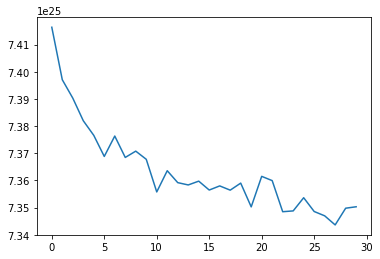

In [114]:
init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example2_rk4, y0, t)
    label_list.append(label)
x = torch.FloatTensor(label_list[:-1])
y = torch.FloatTensor(label_list[1:])

# rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
# linear = nn.Linear(1024, 2)
# h0 = torch.zeros(6, 199, 512)
# out = rnn(x, h0)[0]
# print(out.size())
# out = linear(out)
# print(out.size())
# out = out + x
# print(out.size())
# criterion = nn.MSELoss()
# print("="*50)
# print(out.size())
# print(y.size())
# criterion(output, y)

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
        self.linear = nn.Linear(1024, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 199, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-05, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

num_epochs = 30
list_of_loss = []
for epoch in range(0, num_epochs):
    output, h0 = model(x, h0)
    h0 = h0.detach()
    loss = criterion(output, y)
    list_of_loss.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
print(list_of_loss)
px = list(range(0, num_epochs))
plt.plot(px, list_of_loss)

[7.547324851084822e+25, 7.53941350372021e+25, 7.532100753200789e+25, 7.534141885432545e+25, 7.529069030812275e+25, 7.532096141514771e+25, 7.521941670070796e+25, 7.534229507466895e+25, 7.505615840396961e+25, 7.526866028401272e+25, 4.017591101126702e+25, 4.017294569715717e+25, 4.014986420863494e+25, 4.010699397540764e+25, 4.012693490575132e+25, 4.017554207638554e+25, 4.011762391168011e+25, 4.013721435388639e+25, 4.0082459805789605e+25, 4.012490576390321e+25, 6.246714101737838e+25, 6.252869319066633e+25, 6.2535181832894255e+25, 6.252928348647669e+25, 6.253610878178396e+25, 6.2484771493026825e+25, 6.25090151264257e+25, 6.2430049226732165e+25, 6.249140770920734e+25, 6.241311972735852e+25, 6.28481723512789e+25, 6.277873419489944e+25, 6.2833913018109926e+25, 6.282556125473055e+25, 6.286399504600813e+25, 6.278143203122022e+25, 6.283868150145298e+25, 6.283179625422747e+25, 6.291112186543044e+25, 6.285500225827219e+25, 3.9647656212914216e+25, 3.9576926784449595e+25, 3.961350667794776e+25, 3.9605

AttributeError: 'ResNet' object has no attribute 'save'

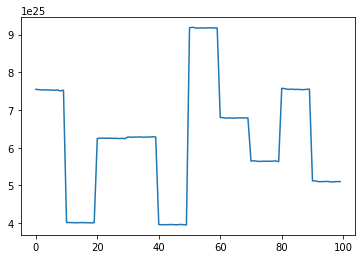

In [9]:
init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example2_rk4, y0, t)
    label_list.append(label)
x = torch.FloatTensor(label_list[:-1])
y = torch.FloatTensor(label_list[1:])

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
        self.linear = nn.Linear(1024, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 49, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

num_epochs = 10
list_of_loss = []
for epoch in range(0, num_epochs):
    init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(-10, 10, 100)
        label = rungekutta4(diff_eqs_example2_rk4, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
    for i in range(0, 10):
        output, h0 = model(x, h0)
        h0 = h0.detach()
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10")

In [181]:
torch.cuda.device_count()

0

In [182]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [226]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.lstm = nn.LSTM(input_size=2, hidden_size=7, bias=True, batch_first=True, num_layers=6, bidirectional=True, dropout=0.1)
        self.linear = nn.Linear(14, 2)
        
    def forward(self, x, h0, c0):
        out, (h0, c0) = self.lstm(x, (h0, c0))
        out = self.linear(out)
        return out + x, h0, c0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)

model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.8, betas=(0.9, 0.99), eps=1e-06, weight_decay=0.1, amsgrad=False)
criterion = nn.MSELoss()
model.train()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma = 0.95)

num_epochs = 60
list_of_loss = []
counter = 1
for epoch in range(0, num_epochs):
    num_k = random.choices(population=np.linspace(100, 200, 100), k=1)
    num_k = int(num_k[0])
    init_1 = random.choices(population=np.linspace(-5, 5, 100), k=num_k)
    init_2 = random.choices(population=np.linspace(-5, 5, 100), k=num_k)
    h0 = torch.zeros(12, num_k-1, 7)
    c0 = torch.zeros(12, num_k-1, 7)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    print("="*80)
    print("This is the <", epoch+1, "> round of initial values")
    print("There are {", len(init_values), "} initial value")
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(0, 2, 20)
        label = rungekutta4(diff_eqs_example2_rk4, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
    for i in range(0, 60):
        output, h0, c0 = model(x, h0, c0)
        h0 = h0.detach()
        c0 = c0.detach()
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        print("-"*80)
        print(lambda1)
        print("This is the <", counter,"> times of training, for this initial value, it is <", i+1, ">")
        print("The current loss value: ", list_of_loss[counter-1])
        print("The current learning rate: ", get_lr(optimizer))
        counter += 1
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10_lstm")

This is the < 1 > round of initial values
There are { 189 } initial value
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1 > times of training, for this initial value, it is < 1 >
The current loss value:  423.13800048828125
The current learning rate:  0.8
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2 > times of training, for this initial value, it is < 2 >
The current loss value:  425.6027526855469
The current learning rate:  0.8
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3 > times of training, for this initial value, it is < 3 >
The current loss value:  422.9005126953125
The current learning rate:  0.8
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 31 > times of training, for this initial value, it is < 31 >
The current loss value:  443.4412841796875
The current learning rate:  0.76
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 32 > times of training, for this initial value, it is < 32 >
The current loss value:  436.0077819824219
The current learning rate:  0.76
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 33 > times of training, for this initial value, it is < 33 >
The current loss value:  428.37152099609375
The current learning rate:  0.76
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 34 > times of training, for this initial

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 61 > times of training, for this initial value, it is < 1 >
The current loss value:  506.00006103515625
The current learning rate:  0.722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 62 > times of training, for this initial value, it is < 2 >
The current loss value:  505.85137939453125
The current learning rate:  0.722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 63 > times of training, for this initial value, it is < 3 >
The current loss value:  506.0001525878906
The current learning rate:  0.722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 64 > times of training, for this initia

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 91 > times of training, for this initial value, it is < 31 >
The current loss value:  506.33367919921875
The current learning rate:  0.6859
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 92 > times of training, for this initial value, it is < 32 >
The current loss value:  505.8116455078125
The current learning rate:  0.6859
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 93 > times of training, for this initial value, it is < 33 >
The current loss value:  505.8296203613281
The current learning rate:  0.6859
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 94 > times of training, for this i

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 121 > times of training, for this initial value, it is < 1 >
The current loss value:  443.115966796875
The current learning rate:  0.6516049999999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 122 > times of training, for this initial value, it is < 2 >
The current loss value:  429.5909729003906
The current learning rate:  0.6516049999999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 123 > times of training, for this initial value, it is < 3 >
The current loss value:  444.7665710449219
The current learning rate:  0.6516049999999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 151 > times of training, for this initial value, it is < 31 >
The current loss value:  394.3492431640625
The current learning rate:  0.6190247499999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 152 > times of training, for this initial value, it is < 32 >
The current loss value:  372.72015380859375
The current learning rate:  0.6190247499999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 153 > times of training, for this initial value, it is < 33 >
The current loss value:  365.3345947265625
The current learning rate:  0.6190247499999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is t

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 180 > times of training, for this initial value, it is < 60 >
The current loss value:  398.491455078125
The current learning rate:  0.5880735124999998
This is the < 4 > round of initial values
There are { 193 } initial value
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 181 > times of training, for this initial value, it is < 1 >
The current loss value:  469.4432067871094
The current learning rate:  0.5880735124999998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 182 > times of training, for this initial value, it is < 2 >
The current loss value:  469.2417297363281
The current learning rate:  0.5880735124999998
--------------------------------------------------------------

The current loss value:  469.2969055175781
The current learning rate:  0.5880735124999998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 209 > times of training, for this initial value, it is < 29 >
The current loss value:  469.2917175292969
The current learning rate:  0.5880735124999998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 210 > times of training, for this initial value, it is < 30 >
The current loss value:  469.28204345703125
The current learning rate:  0.5586698368749998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 211 > times of training, for this initial value, it is < 31 >
The current loss value:  469.2822570800781
The current learning rate:  0.5586698368749998
------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 238 > times of training, for this initial value, it is < 58 >
The current loss value:  469.2718811035156
The current learning rate:  0.5586698368749998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 239 > times of training, for this initial value, it is < 59 >
The current loss value:  469.2717590332031
The current learning rate:  0.5586698368749998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 240 > times of training, for this initial value, it is < 60 >
The current loss value:  469.27166748046875
The current learning rate:  0.5307363450312498
This is the < 5 > round of initial values
There are { 184 } initial value
----------------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 266 > times of training, for this initial value, it is < 26 >
The current loss value:  504.17633056640625
The current learning rate:  0.5307363450312498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 267 > times of training, for this initial value, it is < 27 >
The current loss value:  504.176025390625
The current learning rate:  0.5307363450312498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 268 > times of training, for this initial value, it is < 28 >
The current loss value:  504.1754455566406
The current learning rate:  0.5307363450312498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is th

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 295 > times of training, for this initial value, it is < 55 >
The current loss value:  504.1729431152344
The current learning rate:  0.5041995277796872
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 296 > times of training, for this initial value, it is < 56 >
The current loss value:  504.17291259765625
The current learning rate:  0.5041995277796872
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 297 > times of training, for this initial value, it is < 57 >
The current loss value:  504.1727600097656
The current learning rate:  0.5041995277796872
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is t

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 323 > times of training, for this initial value, it is < 23 >
The current loss value:  528.3162841796875
The current learning rate:  0.4789895513907029
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 324 > times of training, for this initial value, it is < 24 >
The current loss value:  528.316162109375
The current learning rate:  0.4789895513907029
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 325 > times of training, for this initial value, it is < 25 >
The current loss value:  528.31640625
The current learning rate:  0.4789895513907029
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 32

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 352 > times of training, for this initial value, it is < 52 >
The current loss value:  528.3161010742188
The current learning rate:  0.45504007382116773
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 353 > times of training, for this initial value, it is < 53 >
The current loss value:  528.3160400390625
The current learning rate:  0.45504007382116773
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 354 > times of training, for this initial value, it is < 54 >
The current loss value:  528.3160400390625
The current learning rate:  0.45504007382116773
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 381 > times of training, for this initial value, it is < 21 >
The current loss value:  496.2796630859375
The current learning rate:  0.43228807013010934
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 382 > times of training, for this initial value, it is < 22 >
The current loss value:  496.27960205078125
The current learning rate:  0.43228807013010934
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 383 > times of training, for this initial value, it is < 23 >
The current loss value:  496.2796630859375
The current learning rate:  0.43228807013010934
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This i

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 410 > times of training, for this initial value, it is < 50 >
The current loss value:  496.2793273925781
The current learning rate:  0.41067366662360383
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 411 > times of training, for this initial value, it is < 51 >
The current loss value:  496.2792663574219
The current learning rate:  0.41067366662360383
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 412 > times of training, for this initial value, it is < 52 >
The current loss value:  496.2792663574219
The current learning rate:  0.41067366662360383
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 438 > times of training, for this initial value, it is < 18 >
The current loss value:  517.9730834960938
The current learning rate:  0.3901399832924236
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 439 > times of training, for this initial value, it is < 19 >
The current loss value:  517.9730224609375
The current learning rate:  0.3901399832924236
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 440 > times of training, for this initial value, it is < 20 >
The current loss value:  517.9730834960938
The current learning rate:  0.3901399832924236
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is th

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 467 > times of training, for this initial value, it is < 47 >
The current loss value:  517.9730834960938
The current learning rate:  0.37063298412780243
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 468 > times of training, for this initial value, it is < 48 >
The current loss value:  517.9730834960938
The current learning rate:  0.37063298412780243
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 469 > times of training, for this initial value, it is < 49 >
The current loss value:  517.97314453125
The current learning rate:  0.37063298412780243
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is t

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 496 > times of training, for this initial value, it is < 16 >
The current loss value:  502.877197265625
The current learning rate:  0.3521013349214123
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 497 > times of training, for this initial value, it is < 17 >
The current loss value:  502.876953125
The current learning rate:  0.3521013349214123
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 498 > times of training, for this initial value, it is < 18 >
The current loss value:  502.8774108886719
The current learning rate:  0.3521013349214123
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 525 > times of training, for this initial value, it is < 45 >
The current loss value:  502.87677001953125
The current learning rate:  0.33449626817534167
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 526 > times of training, for this initial value, it is < 46 >
The current loss value:  502.8765563964844
The current learning rate:  0.33449626817534167
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 527 > times of training, for this initial value, it is < 47 >
The current loss value:  502.8764343261719
The current learning rate:  0.33449626817534167
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This i

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 553 > times of training, for this initial value, it is < 13 >
The current loss value:  472.1278076171875
The current learning rate:  0.3177714547665746
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 554 > times of training, for this initial value, it is < 14 >
The current loss value:  472.1278381347656
The current learning rate:  0.3177714547665746
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 555 > times of training, for this initial value, it is < 15 >
The current loss value:  472.1277770996094
The current learning rate:  0.3177714547665746
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is th

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 582 > times of training, for this initial value, it is < 42 >
The current loss value:  472.1276550292969
The current learning rate:  0.30188288202824587
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 583 > times of training, for this initial value, it is < 43 >
The current loss value:  472.1275634765625
The current learning rate:  0.30188288202824587
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 584 > times of training, for this initial value, it is < 44 >
The current loss value:  472.1274108886719
The current learning rate:  0.30188288202824587
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 610 > times of training, for this initial value, it is < 10 >
The current loss value:  364.2248229980469
The current learning rate:  0.28678873792683357
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 611 > times of training, for this initial value, it is < 11 >
The current loss value:  364.2210693359375
The current learning rate:  0.28678873792683357
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 612 > times of training, for this initial value, it is < 12 >
The current loss value:  364.2169494628906
The current learning rate:  0.28678873792683357
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 639 > times of training, for this initial value, it is < 39 >
The current loss value:  364.2107849121094
The current learning rate:  0.27244930103049186
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 640 > times of training, for this initial value, it is < 40 >
The current loss value:  364.21044921875
The current learning rate:  0.27244930103049186
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 641 > times of training, for this initial value, it is < 41 >
The current loss value:  364.2104187011719
The current learning rate:  0.27244930103049186
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is t

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 667 > times of training, for this initial value, it is < 7 >
The current loss value:  424.02508544921875
The current learning rate:  0.2588268359789673
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 668 > times of training, for this initial value, it is < 8 >
The current loss value:  424.0301818847656
The current learning rate:  0.2588268359789673
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 669 > times of training, for this initial value, it is < 9 >
The current loss value:  424.02996826171875
The current learning rate:  0.2588268359789673
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 696 > times of training, for this initial value, it is < 36 >
The current loss value:  424.010986328125
The current learning rate:  0.2458854941800189
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 697 > times of training, for this initial value, it is < 37 >
The current loss value:  424.0105285644531
The current learning rate:  0.2458854941800189
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 698 > times of training, for this initial value, it is < 38 >
The current loss value:  424.0103454589844
The current learning rate:  0.2458854941800189
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 725 > times of training, for this initial value, it is < 5 >
The current loss value:  463.5821533203125
The current learning rate:  0.23359121947101794
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 726 > times of training, for this initial value, it is < 6 >
The current loss value:  463.58612060546875
The current learning rate:  0.23359121947101794
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 727 > times of training, for this initial value, it is < 7 >
The current loss value:  463.5897216796875
The current learning rate:  0.23359121947101794
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is t

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 754 > times of training, for this initial value, it is < 34 >
The current loss value:  463.5804443359375
The current learning rate:  0.22191165849746702
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 755 > times of training, for this initial value, it is < 35 >
The current loss value:  463.58038330078125
The current learning rate:  0.22191165849746702
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 756 > times of training, for this initial value, it is < 36 >
The current loss value:  463.5805969238281
The current learning rate:  0.22191165849746702
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This i

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 782 > times of training, for this initial value, it is < 2 >
The current loss value:  546.19482421875
The current learning rate:  0.21081607557259366
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 783 > times of training, for this initial value, it is < 3 >
The current loss value:  546.1942138671875
The current learning rate:  0.21081607557259366
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 784 > times of training, for this initial value, it is < 4 >
The current loss value:  546.1937866210938
The current learning rate:  0.21081607557259366
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 811 > times of training, for this initial value, it is < 31 >
The current loss value:  546.1937255859375
The current learning rate:  0.20027527179396395
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 812 > times of training, for this initial value, it is < 32 >
The current loss value:  546.1937866210938
The current learning rate:  0.20027527179396395
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 813 > times of training, for this initial value, it is < 33 >
The current loss value:  546.1937866210938
The current learning rate:  0.20027527179396395
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 840 > times of training, for this initial value, it is < 60 >
The current loss value:  546.1937866210938
The current learning rate:  0.19026150820426574
This is the < 15 > round of initial values
There are { 101 } initial value
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 841 > times of training, for this initial value, it is < 1 >
The current loss value:  533.785400390625
The current learning rate:  0.19026150820426574
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 842 > times of training, for this initial value, it is < 2 >
The current loss value:  533.7658081054688
The current learning rate:  0.19026150820426574
----------------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 869 > times of training, for this initial value, it is < 29 >
The current loss value:  533.738525390625
The current learning rate:  0.19026150820426574
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 870 > times of training, for this initial value, it is < 30 >
The current loss value:  533.7367553710938
The current learning rate:  0.18074843279405245
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 871 > times of training, for this initial value, it is < 31 >
The current loss value:  533.735595703125
The current learning rate:  0.18074843279405245
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is t

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 898 > times of training, for this initial value, it is < 58 >
The current loss value:  533.7353515625
The current learning rate:  0.18074843279405245
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 899 > times of training, for this initial value, it is < 59 >
The current loss value:  533.7352294921875
The current learning rate:  0.18074843279405245
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 900 > times of training, for this initial value, it is < 60 >
The current loss value:  533.7352905273438
The current learning rate:  0.1717110111543498
This is the < 16 > round of initial values
There are { 115 } initial value
-----------------------------------------------------------

KeyboardInterrupt: 

In [ ]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.lstm = nn.LSTM(input_size=2, hidden_size=7, bias=True, batch_first=True, num_layers=6, bidirectional=True, dropout=0.1)
        self.linear = nn.Linear(14, 2)
        
    def forward(self, x, h0, c0):
        out, (h0, c0) = self.lstm(x, (h0, c0))
        out = self.linear(out)
        return out + x, h0, c0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(12, 1, 7)
c0 = torch.zeros(12, 1, 7)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10_lstm")

t = np.linspace(0, 2, 20)
label_list = []
y0 = np.array([1.5, 0])
label = rungekutta4(diff_eqs_example2_rk4, y0, t)
label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(t, py1)

print(torch.FloatTensor(label_list).size())
print(h0.size())
output, h0, c0 = model(torch.FloatTensor(label_list), h0, c0)
print(h0)
# print(output)
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(t, py2, 'g^')

[[2.9797980785369873, -2.2727272510528564], [-3.8888888359069824, -1.8686869144439697], [3.5858585834503174, 4.39393949508667], [-0.05050504952669144, -2.777777671813965], [-4.4949493408203125, -1.6666666269302368], [-2.777777671813965, -2.1717171669006348], [-2.070707082748413, -4.191919326782227], [3.7878787517547607, -5.0], [1.0606060028076172, -3.2828283309936523], [-3.989898920059204, -0.1515151560306549], [-4.898989677429199, -1.8686869144439697], [-4.39393949508667, -4.797979831695557], [0.1515151560306549, 3.080808162689209], [-4.191919326782227, -2.070707082748413], [3.383838415145874, 4.595959663391113], [1.9696969985961914, 3.080808162689209], [-2.070707082748413, 0.2525252401828766], [2.676767587661743, -1.0606060028076172], [3.5858585834503174, 2.373737335205078], [0.2525252401828766, 0.2525252401828766], [-1.26262629032135, 4.090909004211426], [4.797979831695557, 0.1515151560306549], [-2.777777671813965, 0.6565656661987305], [2.2727272510528564, 0.4545454680919647], [-1.3

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 18 > times of training.
The current loss value:  359.1320495605469
The current learning rate:  0.08
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 19 > times of training.
The current loss value:  624.004150390625
The current learning rate:  0.08
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 20 > times of training.
The current loss value:  370.8584899902344
The current learning rate:  0.08
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 21 > times of training.
The current loss value:  395.7825012207031
The current learning rate:  0.08
-----------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 56 > times of training.
The current loss value:  273.0074462890625
The current learning rate:  0.076
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 57 > times of training.
The current loss value:  272.81146240234375
The current learning rate:  0.076
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 58 > times of training.
The current loss value:  290.2438659667969
The current learning rate:  0.076
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 59 > times of training.
The current loss value:  287.2442626953125
The current learning rate:  0.076
-----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 74 > times of training.
The current loss value:  231.04942321777344
The current learning rate:  0.0722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 75 > times of training.
The current loss value:  225.8922882080078
The current learning rate:  0.0722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 76 > times of training.
The current loss value:  224.7898712158203
The current learning rate:  0.0722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 77 > times of training.
The current loss value:  229.17784118652344
The current learning rate:  0.0722
------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 112 > times of training.
The current loss value:  227.27981567382812
The current learning rate:  0.06859
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 113 > times of training.
The current loss value:  213.27684020996094
The current learning rate:  0.06859
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 114 > times of training.
The current loss value:  212.260498046875
The current learning rate:  0.06859
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 115 > times of training.
The current loss value:  219.98377990722656
The current learning rate:  0.06859
----------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 131 > times of training.
The current loss value:  183.3590087890625
The current learning rate:  0.0651605
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 132 > times of training.
The current loss value:  177.51133728027344
The current learning rate:  0.0651605
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 133 > times of training.
The current loss value:  178.0081787109375
The current learning rate:  0.0651605
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 134 > times of training.
The current loss value:  186.78128051757812
The current learning rate:  0.0651605
--------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 167 > times of training.
The current loss value:  200.54486083984375
The current learning rate:  0.06190247499999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 168 > times of training.
The current loss value:  192.0959014892578
The current learning rate:  0.06190247499999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 169 > times of training.
The current loss value:  200.4041290283203
The current learning rate:  0.06190247499999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 170 > times of training.
The current loss value:  179.24708557128906
The current learning rate:  0.0619

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 185 > times of training.
The current loss value:  290.5976257324219
The current learning rate:  0.05880735124999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 186 > times of training.
The current loss value:  297.5668029785156
The current learning rate:  0.05880735124999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 187 > times of training.
The current loss value:  286.21417236328125
The current learning rate:  0.05880735124999999
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 188 > times of training.
The current loss value:  298.9632568359375
The current learning rate:  0.05880

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 218 > times of training.
The current loss value:  256.7121276855469
The current learning rate:  0.05586698368749998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 219 > times of training.
The current loss value:  247.77658081054688
The current learning rate:  0.05586698368749998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 220 > times of training.
The current loss value:  248.3229217529297
The current learning rate:  0.05586698368749998
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 221 > times of training.
The current loss value:  255.8636474609375
The current learning rate:  0.05586

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 241 > times of training.
The current loss value:  271.7952880859375
The current learning rate:  0.05307363450312498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 242 > times of training.
The current loss value:  279.6674499511719
The current learning rate:  0.05307363450312498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 243 > times of training.
The current loss value:  279.4804382324219
The current learning rate:  0.05307363450312498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 244 > times of training.
The current loss value:  278.99713134765625
The current learning rate:  0.05307

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 274 > times of training.
The current loss value:  248.0908203125
The current learning rate:  0.05041995277796873
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 275 > times of training.
The current loss value:  250.818359375
The current learning rate:  0.05041995277796873
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 276 > times of training.
The current loss value:  251.27749633789062
The current learning rate:  0.05041995277796873
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 277 > times of training.
The current loss value:  239.7169189453125
The current learning rate:  0.050419952777

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 301 > times of training.
The current loss value:  271.62933349609375
The current learning rate:  0.04789895513907029
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 302 > times of training.
The current loss value:  265.09368896484375
The current learning rate:  0.04789895513907029
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 303 > times of training.
The current loss value:  258.3621826171875
The current learning rate:  0.04789895513907029
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 304 > times of training.
The current loss value:  247.0797882080078
The current learning rate:  0.0478

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 335 > times of training.
The current loss value:  241.3588409423828
The current learning rate:  0.045504007382116775
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 336 > times of training.
The current loss value:  249.15847778320312
The current learning rate:  0.045504007382116775
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 337 > times of training.
The current loss value:  243.22474670410156
The current learning rate:  0.045504007382116775
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 338 > times of training.
The current loss value:  241.5673370361328
The current learning rate:  0.0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 365 > times of training.
The current loss value:  324.51995849609375
The current learning rate:  0.043228807013010934
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 366 > times of training.
The current loss value:  278.24371337890625
The current learning rate:  0.043228807013010934
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 367 > times of training.
The current loss value:  266.69793701171875
The current learning rate:  0.043228807013010934
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 368 > times of training.
The current loss value:  321.991943359375
The current learning rate:  0.0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 400 > times of training.
The current loss value:  250.24256896972656
The current learning rate:  0.04106736666236038
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 401 > times of training.
The current loss value:  260.796142578125
The current learning rate:  0.04106736666236038
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 402 > times of training.
The current loss value:  254.05177307128906
The current learning rate:  0.04106736666236038
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 403 > times of training.
The current loss value:  249.83384704589844
The current learning rate:  0.0410

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 421 > times of training.
The current loss value:  307.9003601074219
The current learning rate:  0.039013998329242364
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 422 > times of training.
The current loss value:  274.8089599609375
The current learning rate:  0.039013998329242364
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 423 > times of training.
The current loss value:  290.5912780761719
The current learning rate:  0.039013998329242364
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 424 > times of training.
The current loss value:  278.59759521484375
The current learning rate:  0.03

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 454 > times of training.
The current loss value:  255.32933044433594
The current learning rate:  0.03706329841278024
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 455 > times of training.
The current loss value:  252.94412231445312
The current learning rate:  0.03706329841278024
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 456 > times of training.
The current loss value:  253.4293670654297
The current learning rate:  0.03706329841278024
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 457 > times of training.
The current loss value:  254.84701538085938
The current learning rate:  0.037

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 481 > times of training.
The current loss value:  275.19317626953125
The current learning rate:  0.03521013349214123
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 482 > times of training.
The current loss value:  273.6690673828125
The current learning rate:  0.03521013349214123
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 483 > times of training.
The current loss value:  272.02777099609375
The current learning rate:  0.03521013349214123
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 484 > times of training.
The current loss value:  304.4126892089844
The current learning rate:  0.0352

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 517 > times of training.
The current loss value:  258.3929138183594
The current learning rate:  0.03344962681753417
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 518 > times of training.
The current loss value:  260.4486083984375
The current learning rate:  0.03344962681753417
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 519 > times of training.
The current loss value:  276.6434326171875
The current learning rate:  0.03344962681753417
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 520 > times of training.
The current loss value:  263.4389343261719
The current learning rate:  0.033449

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 541 > times of training.
The current loss value:  270.8702392578125
The current learning rate:  0.031777145476657456
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 542 > times of training.
The current loss value:  269.8858947753906
The current learning rate:  0.031777145476657456
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 543 > times of training.
The current loss value:  276.70379638671875
The current learning rate:  0.031777145476657456
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 544 > times of training.
The current loss value:  259.61016845703125
The current learning rate:  0.0

The current learning rate:  0.03018828820282458
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 576 > times of training.
The current loss value:  255.9722442626953
The current learning rate:  0.03018828820282458
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 577 > times of training.
The current loss value:  254.47897338867188
The current learning rate:  0.03018828820282458
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 578 > times of training.
The current loss value:  270.2449951171875
The current learning rate:  0.03018828820282458
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 579 > times of training.
The current loss value:  265.2

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 601 > times of training.
The current loss value:  240.4866943359375
The current learning rate:  0.02867887379268335
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 602 > times of training.
The current loss value:  255.42481994628906
The current learning rate:  0.02867887379268335
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 603 > times of training.
The current loss value:  314.08544921875
The current learning rate:  0.02867887379268335
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 604 > times of training.
The current loss value:  250.03001403808594
The current learning rate:  0.028678

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 637 > times of training.
The current loss value:  200.46786499023438
The current learning rate:  0.02724493010304918
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 638 > times of training.
The current loss value:  204.85997009277344
The current learning rate:  0.02724493010304918
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 639 > times of training.
The current loss value:  200.9799041748047
The current learning rate:  0.02724493010304918
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 640 > times of training.
The current loss value:  198.6015625
The current learning rate:  0.0272449301

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 661 > times of training.
The current loss value:  267.234375
The current learning rate:  0.025882683597896722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 662 > times of training.
The current loss value:  262.0766296386719
The current learning rate:  0.025882683597896722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 663 > times of training.
The current loss value:  284.7279052734375
The current learning rate:  0.025882683597896722
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 664 > times of training.
The current loss value:  269.7796936035156
The current learning rate:  0.0258826835

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 698 > times of training.
The current loss value:  254.13287353515625
The current learning rate:  0.024588549418001884
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 699 > times of training.
The current loss value:  258.36248779296875
The current learning rate:  0.024588549418001884
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 700 > times of training.
The current loss value:  249.40748596191406
The current learning rate:  0.024588549418001884
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 701 > times of training.
The current loss value:  265.02838134765625
The current learning rate:  0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 721 > times of training.
The current loss value:  256.6039123535156
The current learning rate:  0.02335912194710179
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 722 > times of training.
The current loss value:  253.30715942382812
The current learning rate:  0.02335912194710179
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 723 > times of training.
The current loss value:  256.44561767578125
The current learning rate:  0.02335912194710179
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 724 > times of training.
The current loss value:  259.63458251953125
The current learning rate:  0.023

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 756 > times of training.
The current loss value:  240.6576690673828
The current learning rate:  0.0221911658497467
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 757 > times of training.
The current loss value:  239.819091796875
The current learning rate:  0.0221911658497467
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 758 > times of training.
The current loss value:  237.9313507080078
The current learning rate:  0.0221911658497467
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 759 > times of training.
The current loss value:  248.38421630859375
The current learning rate:  0.022191165

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 781 > times of training.
The current loss value:  251.21009826660156
The current learning rate:  0.021081607557259362
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 782 > times of training.
The current loss value:  249.12957763671875
The current learning rate:  0.021081607557259362
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 783 > times of training.
The current loss value:  253.3583526611328
The current learning rate:  0.021081607557259362
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 784 > times of training.
The current loss value:  253.69796752929688
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 817 > times of training.
The current loss value:  245.46282958984375
The current learning rate:  0.020027527179396393
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 818 > times of training.
The current loss value:  237.04840087890625
The current learning rate:  0.020027527179396393
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 819 > times of training.
The current loss value:  244.26254272460938
The current learning rate:  0.020027527179396393
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 820 > times of training.
The current loss value:  240.85545349121094
The current learning rate:  0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 841 > times of training.
The current loss value:  293.0752258300781
The current learning rate:  0.019026150820426573
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 842 > times of training.
The current loss value:  287.726806640625
The current learning rate:  0.019026150820426573
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 843 > times of training.
The current loss value:  287.8418273925781
The current learning rate:  0.019026150820426573
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 844 > times of training.
The current loss value:  276.7269287109375
The current learning rate:  0.0190

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 874 > times of training.
The current loss value:  256.5091857910156
The current learning rate:  0.018074843279405242
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 875 > times of training.
The current loss value:  243.66539001464844
The current learning rate:  0.018074843279405242
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 876 > times of training.
The current loss value:  247.2240447998047
The current learning rate:  0.018074843279405242
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 877 > times of training.
The current loss value:  234.3029022216797
The current learning rate:  0.01

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 901 > times of training.
The current loss value:  314.81036376953125
The current learning rate:  0.01717110111543498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 902 > times of training.
The current loss value:  309.0809020996094
The current learning rate:  0.01717110111543498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 903 > times of training.
The current loss value:  290.6244812011719
The current learning rate:  0.01717110111543498
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 904 > times of training.
The current loss value:  266.61376953125
The current learning rate:  0.0171711

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 934 > times of training.
The current loss value:  249.9111328125
The current learning rate:  0.01631254605966323
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 935 > times of training.
The current loss value:  252.2440643310547
The current learning rate:  0.01631254605966323
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 936 > times of training.
The current loss value:  234.61289978027344
The current learning rate:  0.01631254605966323
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 937 > times of training.
The current loss value:  246.5380096435547
The current learning rate:  0.01631254

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 961 > times of training.
The current loss value:  324.0964660644531
The current learning rate:  0.015496918756680068
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 962 > times of training.
The current loss value:  252.49989318847656
The current learning rate:  0.015496918756680068
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 963 > times of training.
The current loss value:  279.7867736816406
The current learning rate:  0.015496918756680068
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 964 > times of training.
The current loss value:  272.41241455078125
The current learning rate:  0.0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 997 > times of training.
The current loss value:  248.85137939453125
The current learning rate:  0.014722072818846063
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 998 > times of training.
The current loss value:  239.28627014160156
The current learning rate:  0.014722072818846063
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 999 > times of training.
The current loss value:  244.1388702392578
The current learning rate:  0.014722072818846063
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1000 > times of training.
The current loss value:  246.8302764892578
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1021 > times of training.
The current loss value:  260.2422180175781
The current learning rate:  0.013985969177903759
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1022 > times of training.
The current loss value:  263.5661926269531
The current learning rate:  0.013985969177903759
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1023 > times of training.
The current loss value:  254.79867553710938
The current learning rate:  0.013985969177903759
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1024 > times of training.
The current loss value:  256.2279968261719
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1055 > times of training.
The current loss value:  256.6275634765625
The current learning rate:  0.01328667071900857
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1056 > times of training.
The current loss value:  249.18930053710938
The current learning rate:  0.01328667071900857
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1057 > times of training.
The current loss value:  254.88363647460938
The current learning rate:  0.01328667071900857
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1058 > times of training.
The current loss value:  252.2098388671875
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1081 > times of training.
The current loss value:  234.4793243408203
The current learning rate:  0.01262233718305814
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1082 > times of training.
The current loss value:  238.5054931640625
The current learning rate:  0.01262233718305814
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1083 > times of training.
The current loss value:  224.69100952148438
The current learning rate:  0.01262233718305814
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1084 > times of training.
The current loss value:  224.1324920654297
The current learning rate:  0.0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1118 > times of training.
The current loss value:  208.11988830566406
The current learning rate:  0.011991220323905233
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1119 > times of training.
The current loss value:  223.93179321289062
The current learning rate:  0.011991220323905233
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1120 > times of training.
The current loss value:  222.53738403320312
The current learning rate:  0.011991220323905233
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1121 > times of training.
The current loss value:  210.78492736816406
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1141 > times of training.
The current loss value:  232.75962829589844
The current learning rate:  0.01139165930770997
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1142 > times of training.
The current loss value:  218.972412109375
The current learning rate:  0.01139165930770997
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1143 > times of training.
The current loss value:  225.1421661376953
The current learning rate:  0.01139165930770997
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1144 > times of training.
The current loss value:  240.78912353515625
The current learning rate:  0.0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1175 > times of training.
The current loss value:  182.64601135253906
The current learning rate:  0.01082207634232447
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1176 > times of training.
The current loss value:  188.4076690673828
The current learning rate:  0.01082207634232447
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1177 > times of training.
The current loss value:  189.90414428710938
The current learning rate:  0.01082207634232447
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1178 > times of training.
The current loss value:  185.96791076660156
The current learning rate:  0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1201 > times of training.
The current loss value:  216.7393798828125
The current learning rate:  0.010280972525208246
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1202 > times of training.
The current loss value:  206.66348266601562
The current learning rate:  0.010280972525208246
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1203 > times of training.
The current loss value:  208.2191925048828
The current learning rate:  0.010280972525208246
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1204 > times of training.
The current loss value:  206.49212646484375
The current learning rate: 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1235 > times of training.
The current loss value:  205.5019073486328
The current learning rate:  0.009766923898947833
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1236 > times of training.
The current loss value:  199.5074920654297
The current learning rate:  0.009766923898947833
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1237 > times of training.
The current loss value:  197.7071990966797
The current learning rate:  0.009766923898947833
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1238 > times of training.
The current loss value:  202.716552734375
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1261 > times of training.
The current loss value:  254.6809844970703
The current learning rate:  0.009278577704000441
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1262 > times of training.
The current loss value:  254.02684020996094
The current learning rate:  0.009278577704000441
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1263 > times of training.
The current loss value:  244.75241088867188
The current learning rate:  0.009278577704000441
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1264 > times of training.
The current loss value:  260.8162536621094
The current learning rate: 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1296 > times of training.
The current loss value:  233.91322326660156
The current learning rate:  0.008814648818800418
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1297 > times of training.
The current loss value:  226.52659606933594
The current learning rate:  0.008814648818800418
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1298 > times of training.
The current loss value:  226.88572692871094
The current learning rate:  0.008814648818800418
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1299 > times of training.
The current loss value:  228.62803649902344
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1321 > times of training.
The current loss value:  327.11419677734375
The current learning rate:  0.008373916377860396
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1322 > times of training.
The current loss value:  297.28399658203125
The current learning rate:  0.008373916377860396
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1323 > times of training.
The current loss value:  288.1923522949219
The current learning rate:  0.008373916377860396
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1324 > times of training.
The current loss value:  300.5048828125
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1357 > times of training.
The current loss value:  253.5717315673828
The current learning rate:  0.007955220558967377
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1358 > times of training.
The current loss value:  250.4995880126953
The current learning rate:  0.007955220558967377
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1359 > times of training.
The current loss value:  255.1883087158203
The current learning rate:  0.007955220558967377
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1360 > times of training.
The current loss value:  250.79861450195312
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1381 > times of training.
The current loss value:  303.13665771484375
The current learning rate:  0.007557459531019007
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1382 > times of training.
The current loss value:  269.1738586425781
The current learning rate:  0.007557459531019007
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1383 > times of training.
The current loss value:  272.7115783691406
The current learning rate:  0.007557459531019007
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1384 > times of training.
The current loss value:  269.7639465332031
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1414 > times of training.
The current loss value:  234.34808349609375
The current learning rate:  0.0071795865544680565
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1415 > times of training.
The current loss value:  235.9260711669922
The current learning rate:  0.0071795865544680565
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1416 > times of training.
The current loss value:  243.9287567138672
The current learning rate:  0.0071795865544680565
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1417 > times of training.
The current loss value:  238.06517028808594
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1441 > times of training.
The current loss value:  278.6282958984375
The current learning rate:  0.006820607226744654
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1442 > times of training.
The current loss value:  266.539306640625
The current learning rate:  0.006820607226744654
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1443 > times of training.
The current loss value:  268.18414306640625
The current learning rate:  0.006820607226744654
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1444 > times of training.
The current loss value:  274.122314453125
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1476 > times of training.
The current loss value:  271.50677490234375
The current learning rate:  0.006479576865407421
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1477 > times of training.
The current loss value:  274.13299560546875
The current learning rate:  0.006479576865407421
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1478 > times of training.
The current loss value:  269.4951477050781
The current learning rate:  0.006479576865407421
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1479 > times of training.
The current loss value:  264.1534118652344
The current learning rate: 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1501 > times of training.
The current loss value:  264.1849670410156
The current learning rate:  0.00615559802213705
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1502 > times of training.
The current loss value:  262.19171142578125
The current learning rate:  0.00615559802213705
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1503 > times of training.
The current loss value:  269.3241271972656
The current learning rate:  0.00615559802213705
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1504 > times of training.
The current loss value:  280.2032165527344
The current learning rate:  0.0

The current learning rate:  0.0058478181210301974
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1534 > times of training.
The current loss value:  256.1060485839844
The current learning rate:  0.0058478181210301974
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1535 > times of training.
The current loss value:  250.07186889648438
The current learning rate:  0.0058478181210301974
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1536 > times of training.
The current loss value:  261.35137939453125
The current learning rate:  0.0058478181210301974
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1537 > times of training.
The current loss 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1561 > times of training.
The current loss value:  305.4819030761719
The current learning rate:  0.0055554272149786876
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1562 > times of training.
The current loss value:  293.95635986328125
The current learning rate:  0.0055554272149786876
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1563 > times of training.
The current loss value:  293.44085693359375
The current learning rate:  0.0055554272149786876
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1564 > times of training.
The current loss value:  298.3377380371094
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1595 > times of training.
The current loss value:  301.3296203613281
The current learning rate:  0.005277655854229753
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1596 > times of training.
The current loss value:  290.46429443359375
The current learning rate:  0.005277655854229753
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1597 > times of training.
The current loss value:  279.8848571777344
The current learning rate:  0.005277655854229753
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1598 > times of training.
The current loss value:  294.0989990234375
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1621 > times of training.
The current loss value:  274.7564392089844
The current learning rate:  0.005013773061518265
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1622 > times of training.
The current loss value:  279.8927001953125
The current learning rate:  0.005013773061518265
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1623 > times of training.
The current loss value:  276.762451171875
The current learning rate:  0.005013773061518265
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1624 > times of training.
The current loss value:  268.25128173828125
The current learning rate:  0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1656 > times of training.
The current loss value:  269.1750183105469
The current learning rate:  0.004763084408442352
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1657 > times of training.
The current loss value:  266.8067932128906
The current learning rate:  0.004763084408442352
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1658 > times of training.
The current loss value:  267.08837890625
The current learning rate:  0.004763084408442352
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1659 > times of training.
The current loss value:  253.99444580078125
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1681 > times of training.
The current loss value:  285.1260681152344
The current learning rate:  0.004524930188020234
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1682 > times of training.
The current loss value:  277.9795227050781
The current learning rate:  0.004524930188020234
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1683 > times of training.
The current loss value:  280.0974426269531
The current learning rate:  0.004524930188020234
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1684 > times of training.
The current loss value:  275.7324523925781
The current learning rate:  0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1714 > times of training.
The current loss value:  250.4779052734375
The current learning rate:  0.004298683678619222
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1715 > times of training.
The current loss value:  263.5384826660156
The current learning rate:  0.004298683678619222
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1716 > times of training.
The current loss value:  253.3403778076172
The current learning rate:  0.004298683678619222
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1717 > times of training.
The current loss value:  250.59815979003906
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1741 > times of training.
The current loss value:  288.95184326171875
The current learning rate:  0.00408374949468826
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1742 > times of training.
The current loss value:  284.0970764160156
The current learning rate:  0.00408374949468826
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1743 > times of training.
The current loss value:  278.63531494140625
The current learning rate:  0.00408374949468826
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1744 > times of training.
The current loss value:  283.1364440917969
The current learning rate:  0.

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1778 > times of training.
The current loss value:  265.0194396972656
The current learning rate:  0.003879562019953847
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1779 > times of training.
The current loss value:  260.5382385253906
The current learning rate:  0.003879562019953847
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1780 > times of training.
The current loss value:  266.5722961425781
The current learning rate:  0.003879562019953847
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1781 > times of training.
The current loss value:  261.0777893066406
The current learning rate:  0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1801 > times of training.
The current loss value:  283.9393005371094
The current learning rate:  0.0036855839189561547
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1802 > times of training.
The current loss value:  270.576416015625
The current learning rate:  0.0036855839189561547
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1803 > times of training.
The current loss value:  282.3687438964844
The current learning rate:  0.0036855839189561547
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1804 > times of training.
The current loss value:  272.9275817871094
The current learning rate: 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1834 > times of training.
The current loss value:  265.9442443847656
The current learning rate:  0.003501304723008347
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1835 > times of training.
The current loss value:  271.215576171875
The current learning rate:  0.003501304723008347
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1836 > times of training.
The current loss value:  263.68023681640625
The current learning rate:  0.003501304723008347
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1837 > times of training.
The current loss value:  262.7597961425781
The current learning rate:  0

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1861 > times of training.
The current loss value:  256.282470703125
The current learning rate:  0.0033262394868579293
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1862 > times of training.
The current loss value:  254.630859375
The current learning rate:  0.0033262394868579293
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1863 > times of training.
The current loss value:  254.3022003173828
The current learning rate:  0.0033262394868579293
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1864 > times of training.
The current loss value:  251.42376708984375
The current learning rate:  0.

This is the < 1894 > times of training.
The current loss value:  242.5516357421875
The current learning rate:  0.003159927512515033
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1895 > times of training.
The current loss value:  253.16200256347656
The current learning rate:  0.003159927512515033
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1896 > times of training.
The current loss value:  252.95724487304688
The current learning rate:  0.003159927512515033
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1897 > times of training.
The current loss value:  247.51455688476562
The current learning rate:  0.003159927512515033
--------------------------------------------------------------------------------
<function <lambda> 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1921 > times of training.
The current loss value:  266.5658874511719
The current learning rate:  0.003001931136889281
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1922 > times of training.
The current loss value:  264.6080322265625
The current learning rate:  0.003001931136889281
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1923 > times of training.
The current loss value:  249.29713439941406
The current learning rate:  0.003001931136889281
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1924 > times of training.
The current loss value:  253.46839904785156
The current learning rate: 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1956 > times of training.
The current loss value:  245.52835083007812
The current learning rate:  0.0028518345800448166
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1957 > times of training.
The current loss value:  246.9193572998047
The current learning rate:  0.0028518345800448166
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1958 > times of training.
The current loss value:  245.95489501953125
The current learning rate:  0.0028518345800448166
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1959 > times of training.
The current loss value:  240.92807006835938
The current learning ra

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1981 > times of training.
The current loss value:  303.95654296875
The current learning rate:  0.0027092428510425755
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1982 > times of training.
The current loss value:  293.44793701171875
The current learning rate:  0.0027092428510425755
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1983 > times of training.
The current loss value:  288.25994873046875
The current learning rate:  0.0027092428510425755
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1984 > times of training.
The current loss value:  295.4206237792969
The current learning rate:

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2015 > times of training.
The current loss value:  277.9825439453125
The current learning rate:  0.0025737807084904468
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2016 > times of training.
The current loss value:  271.61920166015625
The current learning rate:  0.0025737807084904468
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2017 > times of training.
The current loss value:  273.52850341796875
The current learning rate:  0.0025737807084904468
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2018 > times of training.
The current loss value:  276.6086120605469
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2041 > times of training.
The current loss value:  575.635498046875
The current learning rate:  0.002445091673065924
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2042 > times of training.
The current loss value:  353.13714599609375
The current learning rate:  0.002445091673065924
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2043 > times of training.
The current loss value:  346.3607177734375
The current learning rate:  0.002445091673065924
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2044 > times of training.
The current loss value:  338.78338623046875
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2077 > times of training.
The current loss value:  260.8050842285156
The current learning rate:  0.002322837089412628
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2078 > times of training.
The current loss value:  248.07496643066406
The current learning rate:  0.002322837089412628
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2079 > times of training.
The current loss value:  269.1129150390625
The current learning rate:  0.002322837089412628
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2080 > times of training.
The current loss value:  261.9955139160156
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2101 > times of training.
The current loss value:  338.06451416015625
The current learning rate:  0.0022066952349419963
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2102 > times of training.
The current loss value:  315.2930908203125
The current learning rate:  0.0022066952349419963
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2103 > times of training.
The current loss value:  293.1036376953125
The current learning rate:  0.0022066952349419963
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2104 > times of training.
The current loss value:  296.1943359375
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2136 > times of training.
The current loss value:  273.3241882324219
The current learning rate:  0.0020963604731948963
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2137 > times of training.
The current loss value:  263.45257568359375
The current learning rate:  0.0020963604731948963
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2138 > times of training.
The current loss value:  274.2552185058594
The current learning rate:  0.0020963604731948963
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2139 > times of training.
The current loss value:  271.1860046386719
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2161 > times of training.
The current loss value:  268.6937561035156
The current learning rate:  0.0019915424495351515
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2162 > times of training.
The current loss value:  272.4728698730469
The current learning rate:  0.0019915424495351515
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2163 > times of training.
The current loss value:  262.63067626953125
The current learning rate:  0.0019915424495351515
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2164 > times of training.
The current loss value:  256.8557434082031
The current learning rate

This is the < 2194 > times of training.
The current loss value:  238.45181274414062
The current learning rate:  0.0018919653270583938
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2195 > times of training.
The current loss value:  240.9005584716797
The current learning rate:  0.0018919653270583938
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2196 > times of training.
The current loss value:  241.2200164794922
The current learning rate:  0.0018919653270583938
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2197 > times of training.
The current loss value:  237.509765625
The current learning rate:  0.0018919653270583938
--------------------------------------------------------------------------------
<function <lambda> at

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2221 > times of training.
The current loss value:  261.3855285644531
The current learning rate:  0.001797367060705474
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2222 > times of training.
The current loss value:  270.0666198730469
The current learning rate:  0.001797367060705474
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2223 > times of training.
The current loss value:  262.52752685546875
The current learning rate:  0.001797367060705474
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2224 > times of training.
The current loss value:  261.1428527832031
The current learning rate:  

The current loss value:  248.1596221923828
The current learning rate:  0.0017074987076702002
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2254 > times of training.
The current loss value:  247.9499053955078
The current learning rate:  0.0017074987076702002
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2255 > times of training.
The current loss value:  249.00050354003906
The current learning rate:  0.0017074987076702002
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2256 > times of training.
The current loss value:  243.9815216064453
The current learning rate:  0.0017074987076702002
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2281 > times of training.
The current loss value:  216.7432861328125
The current learning rate:  0.0016221237722866902
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2282 > times of training.
The current loss value:  225.64512634277344
The current learning rate:  0.0016221237722866902
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2283 > times of training.
The current loss value:  217.0084228515625
The current learning rate:  0.0016221237722866902
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2284 > times of training.
The current loss value:  220.53932189941406
The current learning rat

This is the < 2313 > times of training.
The current loss value:  210.7552947998047
The current learning rate:  0.0015410175836723557
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2314 > times of training.
The current loss value:  202.05955505371094
The current learning rate:  0.0015410175836723557
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2315 > times of training.
The current loss value:  212.30548095703125
The current learning rate:  0.0015410175836723557
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2316 > times of training.
The current loss value:  207.46853637695312
The current learning rate:  0.0015410175836723557
--------------------------------------------------------------------------------
<function <lamb

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2341 > times of training.
The current loss value:  264.1761169433594
The current learning rate:  0.0014639667044887379
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2342 > times of training.
The current loss value:  255.89476013183594
The current learning rate:  0.0014639667044887379
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2343 > times of training.
The current loss value:  257.6913757324219
The current learning rate:  0.0014639667044887379
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2344 > times of training.
The current loss value:  251.11549377441406
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2376 > times of training.
The current loss value:  243.0417022705078
The current learning rate:  0.001390768369264301
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2377 > times of training.
The current loss value:  236.9285888671875
The current learning rate:  0.001390768369264301
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2378 > times of training.
The current loss value:  237.9255828857422
The current learning rate:  0.001390768369264301
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2379 > times of training.
The current loss value:  239.41976928710938
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2401 > times of training.
The current loss value:  293.30902099609375
The current learning rate:  0.0013212299508010858
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2402 > times of training.
The current loss value:  285.4869384765625
The current learning rate:  0.0013212299508010858
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2403 > times of training.
The current loss value:  294.5386047363281
The current learning rate:  0.0013212299508010858
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2404 > times of training.
The current loss value:  290.9970703125
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2435 > times of training.
The current loss value:  272.80609130859375
The current learning rate:  0.0012551684532610314
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2436 > times of training.
The current loss value:  269.7681884765625
The current learning rate:  0.0012551684532610314
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2437 > times of training.
The current loss value:  267.4353942871094
The current learning rate:  0.0012551684532610314
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2438 > times of training.
The current loss value:  277.2611389160156
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2461 > times of training.
The current loss value:  305.4488525390625
The current learning rate:  0.0011924100305979797
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2462 > times of training.
The current loss value:  299.00299072265625
The current learning rate:  0.0011924100305979797
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2463 > times of training.
The current loss value:  289.63580322265625
The current learning rate:  0.0011924100305979797
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2464 > times of training.
The current loss value:  284.08758544921875
The current learning ra

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2495 > times of training.
The current loss value:  274.60205078125
The current learning rate:  0.0011327895290680807
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2496 > times of training.
The current loss value:  266.5797424316406
The current learning rate:  0.0011327895290680807
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2497 > times of training.
The current loss value:  270.6447448730469
The current learning rate:  0.0011327895290680807
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2498 > times of training.
The current loss value:  277.2668151855469
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2521 > times of training.
The current loss value:  255.74484252929688
The current learning rate:  0.0010761500526146766
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2522 > times of training.
The current loss value:  265.22222900390625
The current learning rate:  0.0010761500526146766
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2523 > times of training.
The current loss value:  251.00393676757812
The current learning rate:  0.0010761500526146766
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2524 > times of training.
The current loss value:  252.22923278808594
The current learning r

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2554 > times of training.
The current loss value:  244.65640258789062
The current learning rate:  0.0010223425499839428
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2555 > times of training.
The current loss value:  249.30975341796875
The current learning rate:  0.0010223425499839428
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2556 > times of training.
The current loss value:  239.56411743164062
The current learning rate:  0.0010223425499839428
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2557 > times of training.
The current loss value:  243.33099365234375
The current learning r

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2581 > times of training.
The current loss value:  247.6777801513672
The current learning rate:  0.0009712254224847456
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2582 > times of training.
The current loss value:  225.59693908691406
The current learning rate:  0.0009712254224847456
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2583 > times of training.
The current loss value:  225.54156494140625
The current learning rate:  0.0009712254224847456
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2584 > times of training.
The current loss value:  230.69281005859375
The current learning ra

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2614 > times of training.
The current loss value:  222.2960968017578
The current learning rate:  0.0009226641513605082
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2615 > times of training.
The current loss value:  224.51646423339844
The current learning rate:  0.0009226641513605082
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2616 > times of training.
The current loss value:  221.0952911376953
The current learning rate:  0.0009226641513605082
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2617 > times of training.
The current loss value:  226.52120971679688
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2641 > times of training.
The current loss value:  263.4745178222656
The current learning rate:  0.0008765309437924828
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2642 > times of training.
The current loss value:  262.2437744140625
The current learning rate:  0.0008765309437924828
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2643 > times of training.
The current loss value:  262.69268798828125
The current learning rate:  0.0008765309437924828
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2644 > times of training.
The current loss value:  262.3385009765625
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2677 > times of training.
The current loss value:  257.6965637207031
The current learning rate:  0.0008327043966028586
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2678 > times of training.
The current loss value:  256.5670471191406
The current learning rate:  0.0008327043966028586
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2679 > times of training.
The current loss value:  255.01071166992188
The current learning rate:  0.0008327043966028586
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2680 > times of training.
The current loss value:  257.8824768066406
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2701 > times of training.
The current loss value:  265.3368835449219
The current learning rate:  0.0007910691767727156
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2702 > times of training.
The current loss value:  249.697998046875
The current learning rate:  0.0007910691767727156
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2703 > times of training.
The current loss value:  242.03460693359375
The current learning rate:  0.0007910691767727156
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2704 > times of training.
The current loss value:  236.2174530029297
The current learning rate:

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2734 > times of training.
The current loss value:  236.4002227783203
The current learning rate:  0.0007515157179340798
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2735 > times of training.
The current loss value:  243.02850341796875
The current learning rate:  0.0007515157179340798
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2736 > times of training.
The current loss value:  235.0962371826172
The current learning rate:  0.0007515157179340798
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2737 > times of training.
The current loss value:  236.54600524902344
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2761 > times of training.
The current loss value:  249.4503173828125
The current learning rate:  0.0007139399320373758
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2762 > times of training.
The current loss value:  244.47512817382812
The current learning rate:  0.0007139399320373758
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2763 > times of training.
The current loss value:  236.87551879882812
The current learning rate:  0.0007139399320373758
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2764 > times of training.
The current loss value:  225.82542419433594
The current learning ra

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2794 > times of training.
The current loss value:  224.3186798095703
The current learning rate:  0.000678242935435507
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2795 > times of training.
The current loss value:  228.4499969482422
The current learning rate:  0.000678242935435507
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2796 > times of training.
The current loss value:  226.2657928466797
The current learning rate:  0.000678242935435507
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2797 > times of training.
The current loss value:  231.22044372558594
The current learning rate:  

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2821 > times of training.
The current loss value:  250.91258239746094
The current learning rate:  0.0006443307886637316
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2822 > times of training.
The current loss value:  247.0774688720703
The current learning rate:  0.0006443307886637316
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2823 > times of training.
The current loss value:  242.7199249267578
The current learning rate:  0.0006443307886637316
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2824 > times of training.
The current loss value:  240.59619140625
The current learning rate: 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2853 > times of training.
The current loss value:  229.03713989257812
The current learning rate:  0.0006121142492305449
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2854 > times of training.
The current loss value:  235.4882049560547
The current learning rate:  0.0006121142492305449
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2855 > times of training.
The current loss value:  232.65957641601562
The current learning rate:  0.0006121142492305449
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2856 > times of training.
The current loss value:  231.2771453857422
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2881 > times of training.
The current loss value:  326.0503234863281
The current learning rate:  0.0005815085367690177
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2882 > times of training.
The current loss value:  332.4720458984375
The current learning rate:  0.0005815085367690177
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2883 > times of training.
The current loss value:  319.0710144042969
The current learning rate:  0.0005815085367690177
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2884 > times of training.
The current loss value:  326.2476806640625
The current learning rate:

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2917 > times of training.
The current loss value:  315.9346618652344
The current learning rate:  0.0005524331099305668
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2918 > times of training.
The current loss value:  309.1366271972656
The current learning rate:  0.0005524331099305668
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2919 > times of training.
The current loss value:  303.92840576171875
The current learning rate:  0.0005524331099305668
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2920 > times of training.
The current loss value:  304.6778869628906
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2941 > times of training.
The current loss value:  262.26483154296875
The current learning rate:  0.0005248114544340384
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2942 > times of training.
The current loss value:  263.87744140625
The current learning rate:  0.0005248114544340384
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2943 > times of training.
The current loss value:  260.5196533203125
The current learning rate:  0.0005248114544340384
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2944 > times of training.
The current loss value:  251.11212158203125
The current learning rate:

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2976 > times of training.
The current loss value:  242.4396209716797
The current learning rate:  0.0004985708817123364
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2977 > times of training.
The current loss value:  245.9732666015625
The current learning rate:  0.0004985708817123364
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2978 > times of training.
The current loss value:  246.7427215576172
The current learning rate:  0.0004985708817123364
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2979 > times of training.
The current loss value:  247.42030334472656
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3001 > times of training.
The current loss value:  224.4624786376953
The current learning rate:  0.0004736423376267196
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3002 > times of training.
The current loss value:  223.08541870117188
The current learning rate:  0.0004736423376267196
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3003 > times of training.
The current loss value:  220.51068115234375
The current learning rate:  0.0004736423376267196
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3004 > times of training.
The current loss value:  221.68841552734375
The current learning ra

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3034 > times of training.
The current loss value:  205.12725830078125
The current learning rate:  0.00044996022074538357
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3035 > times of training.
The current loss value:  201.47470092773438
The current learning rate:  0.00044996022074538357
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3036 > times of training.
The current loss value:  206.9474334716797
The current learning rate:  0.00044996022074538357
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3037 > times of training.
The current loss value:  213.30636596679688
The current learning

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3065 > times of training.
The current loss value:  246.08026123046875
The current learning rate:  0.00042746220970811435
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3066 > times of training.
The current loss value:  246.7657012939453
The current learning rate:  0.00042746220970811435
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3067 > times of training.
The current loss value:  243.7412872314453
The current learning rate:  0.00042746220970811435
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3068 > times of training.
The current loss value:  247.40333557128906
The current learning 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3097 > times of training.
The current loss value:  234.37977600097656
The current learning rate:  0.0004060890992227086
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3098 > times of training.
The current loss value:  245.7938232421875
The current learning rate:  0.0004060890992227086
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3099 > times of training.
The current loss value:  235.0330810546875
The current learning rate:  0.0004060890992227086
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3100 > times of training.
The current loss value:  244.9164276123047
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3121 > times of training.
The current loss value:  226.19082641601562
The current learning rate:  0.00038578464426157315
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3122 > times of training.
The current loss value:  228.53048706054688
The current learning rate:  0.00038578464426157315
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3123 > times of training.
The current loss value:  220.23773193359375
The current learning rate:  0.00038578464426157315
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3124 > times of training.
The current loss value:  223.4733428955078
The current learning

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3154 > times of training.
The current loss value:  220.59620666503906
The current learning rate:  0.0003664954120484945
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3155 > times of training.
The current loss value:  218.33387756347656
The current learning rate:  0.0003664954120484945
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3156 > times of training.
The current loss value:  210.08465576171875
The current learning rate:  0.0003664954120484945
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3157 > times of training.
The current loss value:  207.87278747558594
The current learning r

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3181 > times of training.
The current loss value:  285.442138671875
The current learning rate:  0.00034817064144606973
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3182 > times of training.
The current loss value:  240.2421112060547
The current learning rate:  0.00034817064144606973
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3183 > times of training.
The current loss value:  236.5135955810547
The current learning rate:  0.00034817064144606973
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3184 > times of training.
The current loss value:  231.7779083251953
The current learning rat

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3215 > times of training.
The current loss value:  225.1102752685547
The current learning rate:  0.00033076210937376624
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3216 > times of training.
The current loss value:  223.8750457763672
The current learning rate:  0.00033076210937376624
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3217 > times of training.
The current loss value:  225.31617736816406
The current learning rate:  0.00033076210937376624
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3218 > times of training.
The current loss value:  223.7524871826172
The current learning r

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3241 > times of training.
The current loss value:  267.8824768066406
The current learning rate:  0.0003142240039050779
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3242 > times of training.
The current loss value:  261.3022155761719
The current learning rate:  0.0003142240039050779
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3243 > times of training.
The current loss value:  265.567138671875
The current learning rate:  0.0003142240039050779
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3244 > times of training.
The current loss value:  259.3106384277344
The current learning rate: 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3277 > times of training.
The current loss value:  249.30020141601562
The current learning rate:  0.000298512803709824
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3278 > times of training.
The current loss value:  251.81736755371094
The current learning rate:  0.000298512803709824
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3279 > times of training.
The current loss value:  251.14549255371094
The current learning rate:  0.000298512803709824
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3280 > times of training.
The current loss value:  248.80601501464844
The current learning rate

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3301 > times of training.
The current loss value:  266.916259765625
The current learning rate:  0.0002835871635243328
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3302 > times of training.
The current loss value:  246.5982666015625
The current learning rate:  0.0002835871635243328
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3303 > times of training.
The current loss value:  244.11087036132812
The current learning rate:  0.0002835871635243328
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3304 > times of training.
The current loss value:  240.5113525390625
The current learning rate:

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3334 > times of training.
The current loss value:  236.52685546875
The current learning rate:  0.00026940780534811615
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3335 > times of training.
The current loss value:  244.61705017089844
The current learning rate:  0.00026940780534811615
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3336 > times of training.
The current loss value:  234.43695068359375
The current learning rate:  0.00026940780534811615
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3337 > times of training.
The current loss value:  241.75209045410156
The current learning r

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3361 > times of training.
The current loss value:  247.75930786132812
The current learning rate:  0.00025593741508071034
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3362 > times of training.
The current loss value:  228.02536010742188
The current learning rate:  0.00025593741508071034
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3363 > times of training.
The current loss value:  232.13340759277344
The current learning rate:  0.00025593741508071034
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3364 > times of training.
The current loss value:  231.24131774902344
The current learnin

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3394 > times of training.
The current loss value:  220.04624938964844
The current learning rate:  0.0002431405443266748
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3395 > times of training.
The current loss value:  218.01210021972656
The current learning rate:  0.0002431405443266748
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3396 > times of training.
The current loss value:  222.13768005371094
The current learning rate:  0.0002431405443266748
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3397 > times of training.
The current loss value:  222.61585998535156
The current learning r

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3421 > times of training.
The current loss value:  276.1509704589844
The current learning rate:  0.00023098351711034105
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3422 > times of training.
The current loss value:  242.89108276367188
The current learning rate:  0.00023098351711034105
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3423 > times of training.
The current loss value:  248.7751922607422
The current learning rate:  0.00023098351711034105
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3424 > times of training.
The current loss value:  241.80609130859375
The current learning 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3453 > times of training.
The current loss value:  237.46517944335938
The current learning rate:  0.00021943434125482397
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3454 > times of training.
The current loss value:  254.9653778076172
The current learning rate:  0.00021943434125482397
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3455 > times of training.
The current loss value:  251.62722778320312
The current learning rate:  0.00021943434125482397
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3456 > times of training.
The current loss value:  243.38636779785156
The current learning

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3481 > times of training.
The current loss value:  318.9120178222656
The current learning rate:  0.00020846262419208276
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3482 > times of training.
The current loss value:  272.8170166015625
The current learning rate:  0.00020846262419208276
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3483 > times of training.
The current loss value:  263.1329650878906
The current learning rate:  0.00020846262419208276
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3484 > times of training.
The current loss value:  262.78497314453125
The current learning r

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3513 > times of training.
The current loss value:  248.18040466308594
The current learning rate:  0.0001980394929824786
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3514 > times of training.
The current loss value:  254.24227905273438
The current learning rate:  0.0001980394929824786
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3515 > times of training.
The current loss value:  250.88206481933594
The current learning rate:  0.0001980394929824786
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3516 > times of training.
The current loss value:  243.3048858642578
The current learning ra

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3541 > times of training.
The current loss value:  254.2831573486328
The current learning rate:  0.00018813751833335468
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3542 > times of training.
The current loss value:  254.1831817626953
The current learning rate:  0.00018813751833335468
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3543 > times of training.
The current loss value:  253.61251831054688
The current learning rate:  0.00018813751833335468
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3544 > times of training.
The current loss value:  249.68382263183594
The current learning 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3576 > times of training.
The current loss value:  228.7666778564453
The current learning rate:  0.00017873064241668692
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3577 > times of training.
The current loss value:  226.31153869628906
The current learning rate:  0.00017873064241668692
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3578 > times of training.
The current loss value:  217.70474243164062
The current learning rate:  0.00017873064241668692
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3579 > times of training.
The current loss value:  232.3741912841797
The current learning 

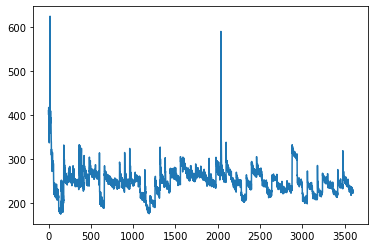

In [209]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=7, bias=True, batch_first=True, num_layers=6, bidirectional=True, dropout=0.1, nonlinearity='relu')
        self.linear = nn.Linear(14, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(12, 99, 7)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.08, betas=(0.9, 0.99), eps=1e-06, weight_decay=0.1, amsgrad=False)
criterion = nn.MSELoss()
model.train()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma = 0.95)

num_epochs = 60
list_of_loss = []
counter = 1
for epoch in range(0, num_epochs):
    init_1 = random.choices(population=np.linspace(-5, 5, 100), k=100)
    init_2 = random.choices(population=np.linspace(-5, 5, 100), k=100)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    print("="*80)
    print(init_values)
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(0, 2, 20)
        label = rungekutta4(diff_eqs_example2_rk4, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
#     if epoch > 10:
#         optimizer = optim.Adam(model.parameters(), lr=0.03, betas=(0.9, 0.99), eps=1e-06, weight_decay=0.1, amsgrad=False)
#         scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma = 0.9)
#     if epoch >= 20:
#         optimizer = optim.Adam(model.parameters(), lr=0.015, betas=(0.9, 0.99), eps=1e-06, weight_decay=0.1, amsgrad=False)
#         scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma = 0.9)
#     if epoch >= 30:
#         optimizer = optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.99), eps=1e-06, weight_decay=0.1, amsgrad=False)
#         scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma = 0.9)
#     if epoch >= 40:
#         optimizer = optim.Adam(model.parameters(), lr=0.008, betas=(0.9, 0.99), eps=1e-06, weight_decay=0.1, amsgrad=False)
#         scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma = 0.85)
#     if epoch >= 50:
#         optimizer = optim.Adam(model.parameters(), lr=0.006, betas=(0.9, 0.99), eps=1e-06, weight_decay=0.1, amsgrad=False)
#         scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma = 0.8)
    for i in range(0, 60):
        output, h0 = model(x, h0)
        h0 = h0.detach()
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        print("-"*80)
        print(lambda1)
        print("This is the <", counter,"> times of training.")
        print("The current loss value: ", list_of_loss[counter-1])
        print("The current learning rate: ", get_lr(optimizer))
        counter += 1
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10")

```python
[47907.30078125, 43507.7890625, 45820.2890625, 44041.140625, 44966.453125, 44949.80078125, 44372.203125, 43890.8359375, 43500.7890625, 43784.99609375, 36074.0390625, 35181.99609375, 34742.66015625, 34963.6796875, 35181.52734375, 35258.2578125, 35148.76953125, 35147.1953125, 35001.234375, 34896.9375, 24533.55859375, 24520.30078125, 24474.4453125, 24421.689453125, 24345.419921875, 24292.109375, 23744.828125, 22796.03515625, 29344.1171875, 26883.630859375, 48514.203125, 48593.359375, 48706.703125, 48624.00390625, 48847.38671875, 48758.54296875, 48994.93359375, 48727.578125, 48736.37890625, 48696.51171875, 43051.16015625, 42749.7109375, 42542.8359375, 42040.08203125, 42069.90234375, 42224.0625, 42588.1171875, 41817.71875, 41870.90234375, 42116.28125, 46248.38671875, 46451.9609375, 46311.8125, 46315.1953125, 46359.8828125, 46172.52734375, 46264.9140625, 46290.9765625, 46137.55859375, 46094.0859375, 48527.359375, 48364.57421875, 48391.94921875, 48268.875, 48192.765625, 47134.11328125, 47151.3203125, 42287.76953125, 64231.6015625, 46626.6484375, 45495.9765625, 44229.2421875, 44511.44140625, 44954.8046875, 45285.8359375, 45440.49609375, 45627.74609375, 45485.08984375, 45220.90234375, 44986.96875, 40496.58203125, 40413.7265625, 40797.81640625, 40604.23828125, 40403.359375, 40118.6875, 40118.91015625, 40204.1484375, 40365.109375, 40584.5703125, 55792.4609375, 55480.06640625, 55544.22265625, 55308.515625, 55097.05859375, 55642.34375, 55749.78515625, 54782.3125, 54450.14453125, 54156.265625]
```

torch.Size([1, 20, 2])
torch.Size([12, 1, 7])
tensor([[[0.0000e+00, 1.0365e+01, 0.0000e+00, 0.0000e+00, 2.0666e-01,
          0.0000e+00, 1.2552e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 5.2041e-01]],

        [[5.1977e+00, 8.7594e-01, 4.2105e-01, 2.1015e+00, 3.8045e+00,
          2.3469e+00, 0.0000e+00]],

        [[8.3066e-01, 0.0000e+00, 0.0000e+00, 2.8351e-01, 1.1036e-01,
          4.7859e-01, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4862e-01, 5.9780e+00,
          5.6081e+00, 0.0000e+00]],

        [[4.6378e-01, 0.0000e+00, 5.7501e-01, 6.9820e-01, 5.5772e+00,
          6.7995e-01, 0.0000e+00]],

        [[2.3626e+00, 2.5180e+00, 1.5278e+00, 0.0000e+00, 7.5237e+00,
          2.4419e-01, 8.1179e+00]],

        [[2.8619e-01, 1.5366e+00, 3.1626e+00, 0.0000e+00, 1.5063e+00,
          6.5183e-01, 3.6660e+00]],

        [[3.9040e-01, 0.0000e+00, 0.0000e+00, 2.2942e+00, 0.0000e+00,
          0.0000e+00, 0.0000

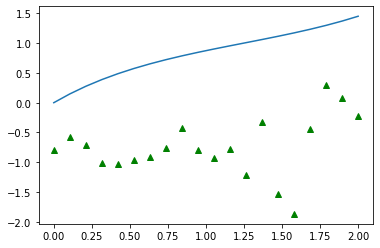

In [210]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=7, bias=True, batch_first=True, num_layers=6, bidirectional=True, dropout=0.1, nonlinearity='relu')
        self.linear = nn.Linear(14, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(12, 1, 7)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10")

# px = list(range(0, len(list_of_loss)))
# plt.plot(px, list_of_loss)

# init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
# init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
# init_1 = torch.FloatTensor(init_1)
# init_2 = torch.FloatTensor(init_2)
# init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

# t = np.linspace(0, 2, 20)
# label_list = []
# for init_value in init_values:
#     y0 = np.array(init_value)
#     label = rungekutta4(diff_eqs_example2_rk4, y0, t)
#     label_list.append(label)
t = np.linspace(0, 2, 20)
label_list = []
y0 = np.array([1.5, 0])
label = rungekutta4(diff_eqs_example2_rk4, y0, t)
label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(t, py1)

print(torch.FloatTensor(label_list).size())
print(h0.size())
output, h0 = model(torch.FloatTensor(label_list), h0)
print(h0)
# print(output)
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(t, py2, 'g^')

torch.Size([1, 20, 2])
torch.Size([12, 1, 7])
tensor([[[2.0821e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.5233e-01, 3.9412e-01, 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[4.3397e-02, 0.0000e+00, 0.0000e+00, 1.4539e-02, 0.0000e+00,
          4.9908e-01, 0.0000e+00]],

        [[1.0969e+00, 7.2458e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.9839e-01, 0.0000e+00]],

        [[0.0000e+00, 9.8517e-03, 0.0000e+00, 1.2659e-01, 6.4964e-02,
          1.1351e+00, 0.0000e+00]],

        [[2.9639e-03, 1.9112e-01, 0.0000e+00, 8.6478e-01, 2.0879e+00,
          0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.0811e+00, 8.1078e-01, 2.4039e-01,
          0.0000e+00, 0.0000e+00]],

        [[1.8876e+00, 2.7782e-02, 0.0000e+00, 3.6403e-01, 3.5081e+00,
          1.3972e-01, 2.9512e+00]],

        [[0.0000e+00, 0.0000e+00, 1.5628e+00, 0.0000e+00, 1.7021e+00,
          0.0000e+00, 0.0000

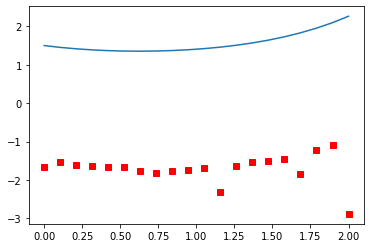

In [195]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=7, bias=True, batch_first=True, num_layers=6, bidirectional=True, dropout=0.1, nonlinearity='relu')
        self.linear = nn.Linear(14, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(12, 1, 7)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10")

# px = list(range(0, len(list_of_loss)))
# plt.plot(px, list_of_loss)

# init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
# init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
# init_1 = torch.FloatTensor(init_1)
# init_2 = torch.FloatTensor(init_2)
# init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

# t = np.linspace(0, 2, 20)
# label_list = []
# for init_value in init_values:
#     y0 = np.array(init_value)
#     label = rungekutta4(diff_eqs_example2_rk4, y0, t)
#     label_list.append(label)
t = np.linspace(0, 2, 20)
label_list = []
y0 = np.array([1.5, 0])
label = rungekutta4(diff_eqs_example2_rk4, y0, t)
label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(t, px1)

print(torch.FloatTensor(label_list).size())
print(h0.size())
output, h0 = model(torch.FloatTensor(label_list), h0)
print(h0)
# print(output)
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(t, px2, 'rs')

In [9]:
def diff_eqs_example_rk4_2(y, t):
    return np.array([y[1], -0.2*math.sin(y[0])-8.91*y[1]])

y0 = np.array([2.5, 3.5])
t = np.linspace(0, 0.1, 100)
sol4 = rungekutta4(diff_eqs_example_rk4_2, y0, t)
print(sol4)

[[2.5        3.5       ]
 [2.50351943 3.46852125]
 [2.50700721 3.4373251 ]
 [2.51046362 3.40640902]
 [2.51388894 3.3757705 ]
 [2.51728345 3.34540704]
 [2.52064743 3.31531618]
 [2.52398115 3.28549546]
 [2.52728488 3.25594248]
 [2.5305589  3.22665482]
 [2.53380346 3.1976301 ]
 [2.53701884 3.16886596]
 [2.5402053  3.14036007]
 [2.54336309 3.11211011]
 [2.54649248 3.08411378]
 [2.54959371 3.05636881]
 [2.55266704 3.02887293]
 [2.55571273 3.00162392]
 [2.55873101 2.97461956]
 [2.56172214 2.94785765]
 [2.56468636 2.92133602]
 [2.56762391 2.89505251]
 [2.57053503 2.86900498]
 [2.57341996 2.84319132]
 [2.57627893 2.81760943]
 [2.57911218 2.79225723]
 [2.58191993 2.76713265]
 [2.58470242 2.74223365]
 [2.58745987 2.71755822]
 [2.59019251 2.69310433]
 [2.59290056 2.66887001]
 [2.59558424 2.64485328]
 [2.59824377 2.62105219]
 [2.60087937 2.59746481]
 [2.60349125 2.57408921]
 [2.60607962 2.5509235 ]
 [2.6086447  2.52796579]
 [2.61118669 2.50521421]
 [2.6137058  2.48266692]
 [2.61620225 2.46032208]


[741.36865234375, 695.1846923828125, 691.05517578125, 696.71337890625, 688.1768798828125, 673.8345947265625, 674.1795654296875, 674.6271362304688, 665.4865112304688, 667.3318481445312, 748.7086181640625, 728.1731567382812, 2014427.25, 3788799.25, 6557.7705078125, 793.4829711914062, 753.13525390625, 752.7832641601562, 757.4171142578125, 760.0711059570312, 588.181640625, 587.1828002929688, 586.0900268554688, 586.8594360351562, 587.527587890625, 586.429931640625, 585.5264282226562, 584.8478393554688, 584.3800659179688, 584.6124877929688, 897.1412353515625, 866.853759765625, 848.4541625976562, 881.1954345703125, 856.5982666015625, 840.741943359375, 852.9379272460938, 857.4859008789062, 845.4592895507812, 828.7283935546875, 684.461181640625, 637.9661865234375, 629.6382446289062, 631.447265625, 615.8905639648438, 588.3303833007812, 38427324.0, 261319344.0, 2808200.75, 1180432.375, 1775.5552978515625, 588.47119140625, 594.3912353515625, 605.31640625, 608.99365234375, 607.2717895507812, 599.90

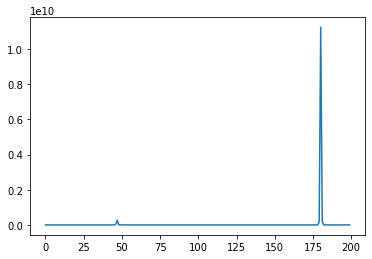

In [46]:
# init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
# init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
# init_1 = torch.FloatTensor(init_1)
# init_2 = torch.FloatTensor(init_2)
# init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

# label_list = []
# for init_value in init_values:
#     y0 = np.array(init_value)
#     t = np.linspace(-10, 10, 100)
#     label = rungekutta4(diff_eqs_example2_rk4_2, y0, t)
#     label_list.append(label)
# x = torch.FloatTensor(label_list[:-1])
# y = torch.FloatTensor(label_list[1:])

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
        self.linear = nn.Linear(1024, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 49, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-05, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

num_epochs = 20
list_of_loss = []
for epoch in range(0, num_epochs):
    init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(-10, 10, 100)
        label = rungekutta4(diff_eqs_example_rk4_2, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
    for i in range(0, 10):
        output, h0 = model(x, h0)
        h0 = h0.detach()
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10_2")

torch.Size([1, 100, 2])
torch.Size([6, 1, 512])
tensor([[[0.4531, 0.8385, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0824, 0.0000,  ..., 1.0355, 0.0000, 1.1005]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.1057, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.1212, 0.0000, 0.0000]],

        [[1.0273, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       grad_fn=<StackBackward>)
[[-5.9614152908325195, -9.764302253723145, -11.718006134033203, -12.716818809509277, -12.961091995239258, -13.61813735961914, -13.589293479919434, -13.872030258178711, -14.063865661621094, -14.110347747802734, -13.824110984802246, -14.116250991821289, -13.890586853027344, -13.875018119812012, -14.151482582092285, -14.212981224060059, -14.02263069152832, -14.236818313598633, -14.202285766601562, -14.061281204223633, -13.883563995361328, -13.960164070129395, -14.0617036819458, -14.17198657989502, -14.04264640808105

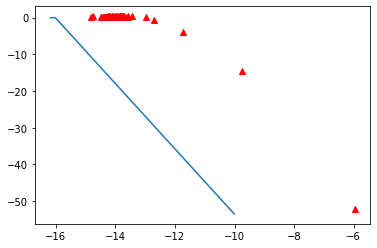

In [51]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
        self.linear = nn.Linear(1024, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 1, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-05, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10_2")

# px = list(range(0, len(list_of_loss)))
# plt.plot(px, list_of_loss)

init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example_rk4_2, y0, t)
    label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(px1, py1)

print(torch.FloatTensor(label_list).size())
print(h0.size())
output, h0 = model(torch.FloatTensor(label_list), h0)
print(h0)
# print(output)
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(px2, py2, 'r^')

[2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2103.450439453125, 2107.290283203125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 2107.24267578125, 1744.6011962890625, 1744.6011962890625, 1744.6011962890625, 1744.6011962890625, 1744.6011962890625, 1744.6011962890625, 1744.6011962890625, 1744.6011962890625, 1744.6011962890625, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

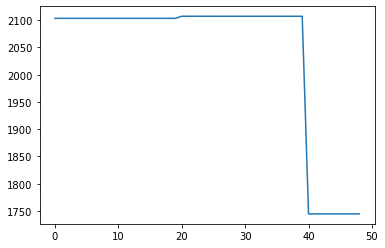

In [52]:
# init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
# init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
# init_1 = torch.FloatTensor(init_1)
# init_2 = torch.FloatTensor(init_2)
# init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

# label_list = []
# for init_value in init_values:
#     y0 = np.array(init_value)
#     t = np.linspace(-10, 10, 100)
#     label = rungekutta4(diff_eqs_example2_rk4_2, y0, t)
#     label_list.append(label)
# x = torch.FloatTensor(label_list[:-1])
# y = torch.FloatTensor(label_list[1:])

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
        self.linear = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return self.relu(out + x), h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 49, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

num_epochs = 30
list_of_loss = []
for epoch in range(0, num_epochs):
    init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(-10, 10, 100)
        label = rungekutta4(diff_eqs_example_rk4_2, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
    for i in range(0, 20):
        output, h0 = model(x, h0)
        h0 = h0.detach()
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10_3")

torch.Size([1, 100, 2])
torch.Size([6, 1, 512])
tensor([[[nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan]]], grad_fn=<StackBackward>)
[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

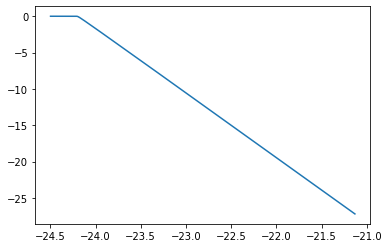

In [56]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.rnn = nn.RNN(input_size=2, hidden_size=512, bias=True, batch_first=True, num_layers=3, bidirectional=True, dropout=0.2, nonlinearity='relu')
        self.linear = nn.Linear(1024, 2)
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return out + x, h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 1, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-05, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10_3")

# px = list(range(0, len(list_of_loss)))
# plt.plot(px, list_of_loss)

init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=1)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example_rk4_2, y0, t)
    label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(px1, py1)

print(torch.FloatTensor(label_list).size())
print(h0.size())
output, h0 = model(torch.FloatTensor(label_list), h0)
print(h0)
# print(output)
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(px2, py2, 'r^')

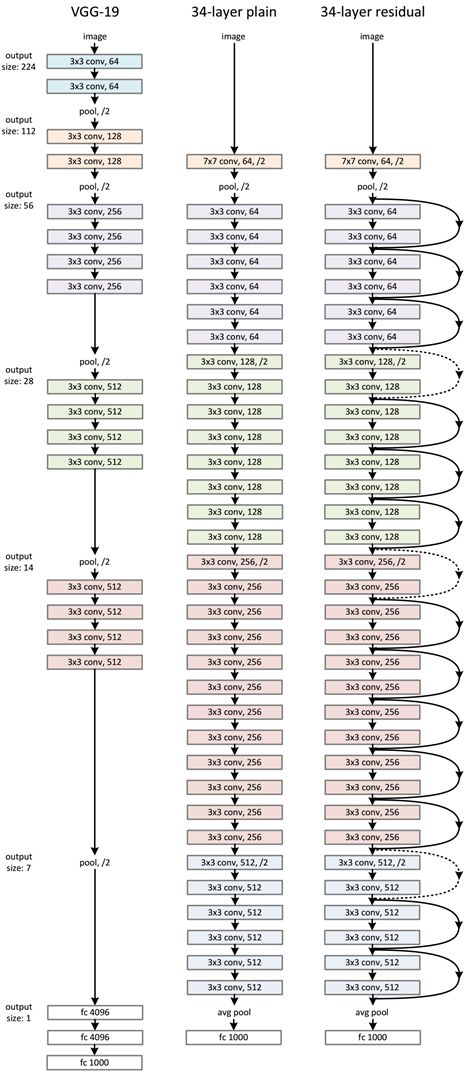

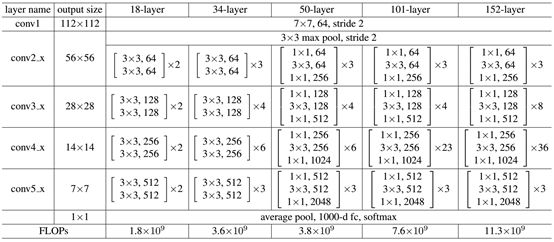

In [ ]:
init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=200)
init_1 = torch.FloatTensor(init_1)
init_2 = torch.FloatTensor(init_2)
init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()

label_list = []
for init_value in init_values:
    y0 = np.array(init_value)
    t = np.linspace(-10, 10, 100)
    label = rungekutta4(diff_eqs_example2_rk4_2, y0, t)
    label_list.append(label)
x = torch.FloatTensor(label_list[:-1])
y = torch.FloatTensor(label_list[1:])

print()

# conv1 = nn.Conv1d(in_channels=16, out_channels=112, kernel_size=7, stride=2)
# pool1 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
# conv2 = nn.Conv1d(in_channels=16, out_channels=33, kernel_size=3, stride=2)
# pool2 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

In [ ]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=16, out_channels=112, kernel_size=7, stride=2)
        self.pool1 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=33, kernel_size=3, stride=2)
        self.pool2 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.linear = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        
    def forward(self, x, h0):
        out, h0 = self.rnn(x, h0)
        out = self.linear(out)
        return self.relu(out + x), h0

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
h0 = torch.zeros(6, 49, 512)
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

num_epochs = 30
list_of_loss = []
for epoch in range(0, num_epochs):
    init_1 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_2 = random.choices(population=np.linspace(-100, 0.1, 100), k=50)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(-10, 10, 100)
        label = rungekutta4(diff_eqs_example_rk4_2, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
    for i in range(0, 20):
        output, h0 = model(x, h0)
        h0 = h0.detach()
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10_4")

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1 > times of training.
The current loss value:  469.9207763671875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2 > times of training.
The current loss value:  469.8587951660156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3 > times of training.
The current loss value:  469.79803466796875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4 > times of training.
The current loss value:  469.73870849609375
The current learning rate:  0.001
--------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 58 > times of training.
The current loss value:  467.38287353515625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 59 > times of training.
The current loss value:  467.32818603515625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 60 > times of training.
The current loss value:  467.27239990234375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 61 > times of training.
The current loss value:  447.48291015625
The current learning rate:  0.001
-----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 94 > times of training.
The current loss value:  445.0245056152344
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 95 > times of training.
The current loss value:  444.80633544921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 96 > times of training.
The current loss value:  444.57232666015625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 97 > times of training.
The current loss value:  444.3241882324219
The current learning rate:  0.001
----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 153 > times of training.
The current loss value:  349.7562561035156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 154 > times of training.
The current loss value:  349.203857421875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 155 > times of training.
The current loss value:  348.6465148925781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 156 > times of training.
The current loss value:  348.0845031738281
The current learning rate:  0.001
---------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 215 > times of training.
The current loss value:  440.757080078125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 216 > times of training.
The current loss value:  439.29473876953125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 217 > times of training.
The current loss value:  437.8587951660156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 218 > times of training.
The current loss value:  436.4476623535156
The current learning rate:  0.001
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 272 > times of training.
The current loss value:  334.84991455078125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 273 > times of training.
The current loss value:  334.78125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 274 > times of training.
The current loss value:  334.7113037109375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 275 > times of training.
The current loss value:  334.6398010253906
The current learning rate:  0.001
---------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 326 > times of training.
The current loss value:  328.3876037597656
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 327 > times of training.
The current loss value:  328.3637390136719
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 328 > times of training.
The current loss value:  328.33984375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 329 > times of training.
The current loss value:  328.31524658203125
The current learning rate:  0.001
------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 361 > times of training.
The current loss value:  284.0989074707031
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 362 > times of training.
The current loss value:  284.0804748535156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 363 > times of training.
The current loss value:  284.0597229003906
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 364 > times of training.
The current loss value:  284.03717041015625
The current learning rate:  0.001
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 421 > times of training.
The current loss value:  395.1587219238281
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 422 > times of training.
The current loss value:  395.107177734375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 423 > times of training.
The current loss value:  395.0093078613281
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 424 > times of training.
The current loss value:  394.8741455078125
The current learning rate:  0.001
---------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 481 > times of training.
The current loss value:  375.79425048828125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 482 > times of training.
The current loss value:  375.614501953125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 483 > times of training.
The current loss value:  375.2981872558594
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 484 > times of training.
The current loss value:  374.881591796875
The current learning rate:  0.001
---------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 541 > times of training.
The current loss value:  384.1265869140625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 542 > times of training.
The current loss value:  383.928466796875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 543 > times of training.
The current loss value:  383.5742492675781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 544 > times of training.
The current loss value:  383.0941467285156
The current learning rate:  0.001
---------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 601 > times of training.
The current loss value:  348.224365234375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 602 > times of training.
The current loss value:  347.8948059082031
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 603 > times of training.
The current loss value:  347.3315734863281
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 604 > times of training.
The current loss value:  346.59503173828125
The current learning rate:  0.001
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 646 > times of training.
The current loss value:  337.9718017578125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 647 > times of training.
The current loss value:  337.9565734863281
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 648 > times of training.
The current loss value:  337.9430236816406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 649 > times of training.
The current loss value:  337.93115234375
The current learning rate:  0.001
----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 684 > times of training.
The current loss value:  364.5533447265625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 685 > times of training.
The current loss value:  364.5274658203125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 686 > times of training.
The current loss value:  364.5176086425781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 687 > times of training.
The current loss value:  364.51983642578125
The current learning rate:  0.001
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 721 > times of training.
The current loss value:  336.3343811035156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 722 > times of training.
The current loss value:  336.3131408691406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 723 > times of training.
The current loss value:  336.2867736816406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 724 > times of training.
The current loss value:  336.25665283203125
The current learning rate:  0.001
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 772 > times of training.
The current loss value:  335.8877258300781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 773 > times of training.
The current loss value:  335.8872985839844
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 774 > times of training.
The current loss value:  335.8868713378906
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 775 > times of training.
The current loss value:  335.88653564453125
The current learning rate:  0.001
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 813 > times of training.
The current loss value:  298.10260009765625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 814 > times of training.
The current loss value:  298.10455322265625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 815 > times of training.
The current loss value:  298.103515625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 816 > times of training.
The current loss value:  298.0996398925781
The current learning rate:  0.001
----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 866 > times of training.
The current loss value:  459.29119873046875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 867 > times of training.
The current loss value:  459.3151550292969
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 868 > times of training.
The current loss value:  459.3372497558594
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 869 > times of training.
The current loss value:  459.35595703125
The current learning rate:  0.001
---------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 901 > times of training.
The current loss value:  350.99359130859375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 902 > times of training.
The current loss value:  350.91802978515625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 903 > times of training.
The current loss value:  350.77008056640625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 904 > times of training.
The current loss value:  350.56219482421875
The current learning rate:  0.001
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 949 > times of training.
The current loss value:  346.93896484375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 950 > times of training.
The current loss value:  346.93731689453125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 951 > times of training.
The current loss value:  346.9364318847656
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 952 > times of training.
The current loss value:  346.93603515625
The current learning rate:  0.001
-----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 988 > times of training.
The current loss value:  348.65185546875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 989 > times of training.
The current loss value:  348.6519775390625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 990 > times of training.
The current loss value:  348.65203857421875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 991 > times of training.
The current loss value:  348.6521301269531
The current learning rate:  0.001
---------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1054 > times of training.
The current loss value:  358.7510681152344
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1055 > times of training.
The current loss value:  358.7478332519531
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1056 > times of training.
The current loss value:  358.74444580078125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1057 > times of training.
The current loss value:  358.7405090332031
The current learning rate:  0.001
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1107 > times of training.
The current loss value:  318.1864929199219
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1108 > times of training.
The current loss value:  318.25592041015625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1109 > times of training.
The current loss value:  318.3026123046875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1110 > times of training.
The current loss value:  318.32635498046875
The current learning rate:  0.001
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1141 > times of training.
The current loss value:  469.5790100097656
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1142 > times of training.
The current loss value:  469.1185607910156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1143 > times of training.
The current loss value:  468.371337890625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1144 > times of training.
The current loss value:  467.3884582519531
The current learning rate:  0.001
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1199 > times of training.
The current loss value:  449.6628723144531
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1200 > times of training.
The current loss value:  449.6595458984375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1201 > times of training.
The current loss value:  334.372314453125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1202 > times of training.
The current loss value:  334.28271484375
The current learning rate:  0.001
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1255 > times of training.
The current loss value:  331.6497802734375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1256 > times of training.
The current loss value:  331.63623046875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1257 > times of training.
The current loss value:  331.62347412109375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1258 > times of training.
The current loss value:  331.6112365722656
The current learning rate:  0.001
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1312 > times of training.
The current loss value:  289.8099060058594
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1313 > times of training.
The current loss value:  289.80474853515625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1314 > times of training.
The current loss value:  289.800048828125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1315 > times of training.
The current loss value:  289.796142578125
The current learning rate:  0.001
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1350 > times of training.
The current loss value:  307.8760070800781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1351 > times of training.
The current loss value:  307.8778991699219
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1352 > times of training.
The current loss value:  307.8798828125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1353 > times of training.
The current loss value:  307.88177490234375
The current learning rate:  0.001
------------------------------------------

The current loss value:  312.9535217285156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1412 > times of training.
The current loss value:  312.950439453125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1413 > times of training.
The current loss value:  312.94732666015625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1414 > times of training.
The current loss value:  312.94415283203125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1415 > times of training.
The current loss value:  312.9410095214

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1474 > times of training.
The current loss value:  306.44073486328125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1475 > times of training.
The current loss value:  306.43505859375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1476 > times of training.
The current loss value:  306.4283142089844
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1477 > times of training.
The current loss value:  306.4193420410156
The current learning rate:  0.001
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1529 > times of training.
The current loss value:  424.04083251953125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1530 > times of training.
The current loss value:  424.0057373046875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1531 > times of training.
The current loss value:  423.97064208984375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1532 > times of training.
The current loss value:  423.9356994628906
The current learning rate:  0.001
--------------------------------------

This is the < 1594 > times of training.
The current loss value:  495.1368408203125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1595 > times of training.
The current loss value:  495.1180419921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1596 > times of training.
The current loss value:  495.0978698730469
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1597 > times of training.
The current loss value:  495.0745544433594
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1598 > times of training.


--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1649 > times of training.
The current loss value:  441.0658874511719
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1650 > times of training.
The current loss value:  441.03582763671875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1651 > times of training.
The current loss value:  441.02294921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1652 > times of training.
The current loss value:  441.0238952636719
The current learning rate:  0.001
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1712 > times of training.
The current loss value:  329.9145812988281
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1713 > times of training.
The current loss value:  329.8671569824219
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1714 > times of training.
The current loss value:  329.82501220703125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1715 > times of training.
The current loss value:  329.78790283203125
The current learning rate:  0.001
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1774 > times of training.
The current loss value:  390.2473449707031
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1775 > times of training.
The current loss value:  390.2029724121094
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1776 > times of training.
The current loss value:  390.1641540527344
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1777 > times of training.
The current loss value:  390.13037109375
The current learning rate:  0.001
------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1830 > times of training.
The current loss value:  292.0995788574219
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1831 > times of training.
The current loss value:  292.0801086425781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1832 > times of training.
The current loss value:  292.06005859375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1833 > times of training.
The current loss value:  292.038818359375
The current learning rate:  0.001
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1893 > times of training.
The current loss value:  374.3347473144531
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1894 > times of training.
The current loss value:  374.2809143066406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1895 > times of training.
The current loss value:  374.2376708984375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1896 > times of training.
The current loss value:  374.20477294921875
The current learning rate:  0.001
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1953 > times of training.
The current loss value:  316.58843994140625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1954 > times of training.
The current loss value:  316.57275390625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1955 > times of training.
The current loss value:  316.5527648925781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1956 > times of training.
The current loss value:  316.52947998046875
The current learning rate:  0.001
----------------------------------------

The current loss value:  375.9273376464844
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2010 > times of training.
The current loss value:  375.9178161621094
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2011 > times of training.
The current loss value:  375.9053039550781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2012 > times of training.
The current loss value:  375.890625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2013 > times of training.
The current loss value:  375.8746337890625
The 

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2069 > times of training.
The current loss value:  379.46795654296875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2070 > times of training.
The current loss value:  379.46514892578125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2071 > times of training.
The current loss value:  379.4625549316406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2072 > times of training.
The current loss value:  379.4603271484375
The current learning rate:  0.001
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2128 > times of training.
The current loss value:  316.1215515136719
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2129 > times of training.
The current loss value:  316.1124572753906
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2130 > times of training.
The current loss value:  316.0975341796875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2131 > times of training.
The current loss value:  316.0784606933594
The current learning rate:  0.001
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2192 > times of training.
The current loss value:  323.4167785644531
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2193 > times of training.
The current loss value:  323.3963623046875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2194 > times of training.
The current loss value:  323.3756408691406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2195 > times of training.
The current loss value:  323.3551330566406
The current learning rate:  0.001
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2252 > times of training.
The current loss value:  389.0757141113281
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2253 > times of training.
The current loss value:  389.07598876953125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2254 > times of training.
The current loss value:  389.076416015625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2255 > times of training.
The current loss value:  389.0758972167969
The current learning rate:  0.001
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2315 > times of training.
The current loss value:  329.2183837890625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2316 > times of training.
The current loss value:  329.1993103027344
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2317 > times of training.
The current loss value:  329.18524169921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2318 > times of training.
The current loss value:  329.17547607421875
The current learning rate:  0.001
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2368 > times of training.
The current loss value:  356.25335693359375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2369 > times of training.
The current loss value:  356.2304382324219
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2370 > times of training.
The current loss value:  356.209228515625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2371 > times of training.
The current loss value:  356.1900634765625
The current learning rate:  0.001
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2432 > times of training.
The current loss value:  421.8826904296875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2433 > times of training.
The current loss value:  421.7701721191406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2434 > times of training.
The current loss value:  421.66937255859375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2435 > times of training.
The current loss value:  421.5835876464844
The current learning rate:  0.001
---------------------------------------

This is the < 2492 > times of training.
The current loss value:  309.59356689453125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2493 > times of training.
The current loss value:  309.5915222167969
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2494 > times of training.
The current loss value:  309.5891418457031
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2495 > times of training.
The current loss value:  309.5862121582031
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2496 > times of training.

The current loss value:  396.2304992675781
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2553 > times of training.
The current loss value:  396.20947265625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2554 > times of training.
The current loss value:  396.1886291503906
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2555 > times of training.
The current loss value:  396.16827392578125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2556 > times of training.
The current loss value:  396.149291992187

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2615 > times of training.
The current loss value:  320.8209533691406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2616 > times of training.
The current loss value:  320.8106994628906
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2617 > times of training.
The current loss value:  320.79669189453125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2618 > times of training.
The current loss value:  320.7799072265625
The current learning rate:  0.001
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2672 > times of training.
The current loss value:  328.3453674316406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2673 > times of training.
The current loss value:  328.3404541015625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2674 > times of training.
The current loss value:  328.3302001953125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2675 > times of training.
The current loss value:  328.3157958984375
The current learning rate:  0.001
----------------------------------------

<function <lambda> at 0x000001E3232E1160>
This is the < 2730 > times of training.
The current loss value:  388.3136291503906
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2731 > times of training.
The current loss value:  388.2607421875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2732 > times of training.
The current loss value:  388.2015075683594
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2733 > times of training.
The current loss value:  388.1402282714844
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
T

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2793 > times of training.
The current loss value:  383.02142333984375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2794 > times of training.
The current loss value:  383.0130310058594
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2795 > times of training.
The current loss value:  383.00543212890625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2796 > times of training.
The current loss value:  382.9983215332031
The current learning rate:  0.001
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2847 > times of training.
The current loss value:  350.1886901855469
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2848 > times of training.
The current loss value:  350.1789855957031
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2849 > times of training.
The current loss value:  350.16455078125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2850 > times of training.
The current loss value:  350.1572570800781
The current learning rate:  0.001
------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2881 > times of training.
The current loss value:  326.30706787109375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2882 > times of training.
The current loss value:  325.95068359375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2883 > times of training.
The current loss value:  325.3688049316406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2884 > times of training.
The current loss value:  324.6384582519531
The current learning rate:  0.001
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2941 > times of training.
The current loss value:  340.5714111328125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2942 > times of training.
The current loss value:  340.5626220703125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2943 > times of training.
The current loss value:  340.5358581542969
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2944 > times of training.
The current loss value:  340.4942626953125
The current learning rate:  0.001
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3001 > times of training.
The current loss value:  351.32598876953125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3002 > times of training.
The current loss value:  351.3094177246094
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3003 > times of training.
The current loss value:  351.2770080566406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3004 > times of training.
The current loss value:  351.23260498046875
The current learning rate:  0.001
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3061 > times of training.
The current loss value:  413.2647705078125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3062 > times of training.
The current loss value:  413.2320556640625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3063 > times of training.
The current loss value:  413.17919921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3064 > times of training.
The current loss value:  413.1116943359375
The current learning rate:  0.001
------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3121 > times of training.
The current loss value:  390.31787109375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3122 > times of training.
The current loss value:  390.2149963378906
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3123 > times of training.
The current loss value:  390.0383605957031
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3124 > times of training.
The current loss value:  389.8065490722656
The current learning rate:  0.001
------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3181 > times of training.
The current loss value:  384.6618957519531
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3182 > times of training.
The current loss value:  384.6607360839844
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3183 > times of training.
The current loss value:  384.65399169921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3184 > times of training.
The current loss value:  384.6423645019531
The current learning rate:  0.001
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3240 > times of training.
The current loss value:  384.2619323730469
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3241 > times of training.
The current loss value:  422.2613525390625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3242 > times of training.
The current loss value:  422.19329833984375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3243 > times of training.
The current loss value:  422.0628662109375
The current learning rate:  0.001
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3301 > times of training.
The current loss value:  351.9512634277344
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3302 > times of training.
The current loss value:  351.6091003417969
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3303 > times of training.
The current loss value:  350.9617919921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3304 > times of training.
The current loss value:  350.12884521484375
The current learning rate:  0.001
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3359 > times of training.
The current loss value:  344.4964904785156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3360 > times of training.
The current loss value:  344.48211669921875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3361 > times of training.
The current loss value:  438.9611511230469
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3362 > times of training.
The current loss value:  438.51702880859375
The current learning rate:  0.001
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3421 > times of training.
The current loss value:  327.1305847167969
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3422 > times of training.
The current loss value:  327.06884765625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3423 > times of training.
The current loss value:  326.9679870605469
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3424 > times of training.
The current loss value:  326.83172607421875
The current learning rate:  0.001
-----------------------------------------

<function <lambda> at 0x000001E3232E1160>
This is the < 3456 > times of training.
The current loss value:  324.5972900390625
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3457 > times of training.
The current loss value:  324.5644226074219
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3458 > times of training.
The current loss value:  324.5213317871094
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3459 > times of training.
The current loss value:  324.47454833984375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E116

The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3513 > times of training.
The current loss value:  346.08233642578125
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3514 > times of training.
The current loss value:  346.0576171875
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3515 > times of training.
The current loss value:  346.0355224609375
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3516 > times of training.
The current loss value:  346.015380859375
The current learning rate:  0.001
---------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3574 > times of training.
The current loss value:  302.8375549316406
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3575 > times of training.
The current loss value:  302.8327941894531
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3576 > times of training.
The current loss value:  302.8226623535156
The current learning rate:  0.001
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3577 > times of training.
The current loss value:  302.8076171875
The current learning rate:  0.001
-------------------------------------------

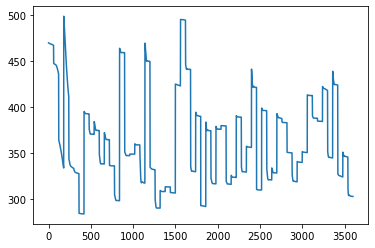

In [256]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.linear1 = nn.Linear(2, 6)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(6, 6)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(6, 6)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(6, 6)
        self.relu4 = nn.ReLU()
        self.linear5 = nn.Linear(6, 2)
        self.relu5 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)
        out = self.relu5(out)
        return out + x

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)

model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma = 0.95)

num_epochs = 60
list_of_loss = []
counter = 1
for epoch in range(0, num_epochs):
    init_1 = random.choices(population=np.linspace(-5, 5, 100), k=100)
    init_2 = random.choices(population=np.linspace(-5, 5, 100), k=100)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    print("="*80)
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(0, 2, 20)
        label = rungekutta4(diff_eqs_example2_rk4, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
#     print(x.size())
#     linear = nn.Linear(2, 6)
#     print(linear(x).size())
#     relu = nn.ReLU()
#     print(relu(linear(x)).size())
    for i in range(0, 60):
        output = model(x)
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        print("-"*80)
        print(lambda1)
        print("This is the <", counter,"> times of training.")
        print("The current loss value: ", list_of_loss[counter-1])
        print("The current learning rate: ", get_lr(optimizer))
        counter += 1
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10_simple")

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1 > times of training.
The current loss value:  393.2767333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2 > times of training.
The current loss value:  393.2767333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3 > times of training.
The current loss value:  393.2767333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4 > times of training.
The current loss value:  393.2767333984375
The current learning rate:  1e-06
----------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 41 > times of training.
The current loss value:  329.64434814453125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 42 > times of training.
The current loss value:  329.64434814453125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 43 > times of training.
The current loss value:  329.64434814453125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 44 > times of training.
The current loss value:  329.64434814453125
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 87 > times of training.
The current loss value:  179.94534301757812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 88 > times of training.
The current loss value:  179.94534301757812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 89 > times of training.
The current loss value:  179.94534301757812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 90 > times of training.
The current loss value:  179.94534301757812
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 134 > times of training.
The current loss value:  766.6889038085938
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 135 > times of training.
The current loss value:  766.6889038085938
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 136 > times of training.
The current loss value:  766.6889038085938
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 137 > times of training.
The current loss value:  766.6889038085938
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 183 > times of training.
The current loss value:  38.34333419799805
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 184 > times of training.
The current loss value:  38.34333419799805
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 185 > times of training.
The current loss value:  38.34333419799805
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 186 > times of training.
The current loss value:  38.34333419799805
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 221 > times of training.
The current loss value:  163.72317504882812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 222 > times of training.
The current loss value:  163.72317504882812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 223 > times of training.
The current loss value:  163.72317504882812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 224 > times of training.
The current loss value:  163.72317504882812
The current learning rate:  1e-06
----------------------------------------

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 269 > times of training.
The current loss value:  80.49790954589844
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 270 > times of training.
The current loss value:  80.49790954589844
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 271 > times of training.
The current loss value:  1305.7947998046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 272 > times of training.
The current loss value:  1305.7947998046875
The current learning rate:  1e-06
--------

The current loss value:  14.6774320602417
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 314 > times of training.
The current loss value:  14.6774320602417
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 315 > times of training.
The current loss value:  14.6774320602417
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 316 > times of training.
The current loss value:  14.6774320602417
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 317 > times of training.
The current loss value:  14.6774320602417
The cu

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 348 > times of training.
The current loss value:  139.8837127685547
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 349 > times of training.
The current loss value:  139.8837127685547
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 350 > times of training.
The current loss value:  139.8837127685547
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 351 > times of training.
The current loss value:  385.83807373046875
The current learning rate:  1e-06
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 388 > times of training.
The current loss value:  2563.490234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 389 > times of training.
The current loss value:  2563.490234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 390 > times of training.
The current loss value:  2563.490234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 391 > times of training.
The current loss value:  55.81090545654297
The current learning rate:  1e-06
-----------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 428 > times of training.
The current loss value:  1146.045654296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 429 > times of training.
The current loss value:  1146.045654296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 430 > times of training.
The current loss value:  1146.045654296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 431 > times of training.
The current loss value:  187.69357299804688
The current learning rate:  1e-06
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 475 > times of training.
The current loss value:  102.31373596191406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 476 > times of training.
The current loss value:  102.31373596191406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 477 > times of training.
The current loss value:  102.31373596191406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 478 > times of training.
The current loss value:  102.31373596191406
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 520 > times of training.
The current loss value:  442.1123962402344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 521 > times of training.
The current loss value:  21.955142974853516
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 522 > times of training.
The current loss value:  21.955142974853516
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 523 > times of training.
The current loss value:  21.955142974853516
The current learning rate:  1e-06
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 563 > times of training.
The current loss value:  185.431884765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 564 > times of training.
The current loss value:  185.431884765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 565 > times of training.
The current loss value:  185.431884765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 566 > times of training.
The current loss value:  185.431884765625
The current learning rate:  1e-06
------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 604 > times of training.
The current loss value:  188.12655639648438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 605 > times of training.
The current loss value:  188.12655639648438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 606 > times of training.
The current loss value:  188.12655639648438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 607 > times of training.
The current loss value:  188.12655639648438
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 651 > times of training.
The current loss value:  998.7312622070312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 652 > times of training.
The current loss value:  998.7312622070312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 653 > times of training.
The current loss value:  998.7312622070312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 654 > times of training.
The current loss value:  998.7312622070312
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 696 > times of training.
The current loss value:  207.5701446533203
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 697 > times of training.
The current loss value:  207.5701446533203
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 698 > times of training.
The current loss value:  207.5701446533203
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 699 > times of training.
The current loss value:  207.5701446533203
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 737 > times of training.
The current loss value:  937.2064208984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 738 > times of training.
The current loss value:  937.2064208984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 739 > times of training.
The current loss value:  937.2064208984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 740 > times of training.
The current loss value:  937.2064208984375
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 781 > times of training.
The current loss value:  8.452108383178711
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 782 > times of training.
The current loss value:  8.452108383178711
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 783 > times of training.
The current loss value:  8.452108383178711
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 784 > times of training.
The current loss value:  8.452108383178711
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 821 > times of training.
The current loss value:  2741.518798828125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 822 > times of training.
The current loss value:  2741.518798828125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 823 > times of training.
The current loss value:  2741.518798828125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 824 > times of training.
The current loss value:  2741.518798828125
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 863 > times of training.
The current loss value:  82.60062408447266
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 864 > times of training.
The current loss value:  82.60062408447266
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 865 > times of training.
The current loss value:  82.60062408447266
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 866 > times of training.
The current loss value:  82.60062408447266
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 903 > times of training.
The current loss value:  171.1759033203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 904 > times of training.
The current loss value:  171.1759033203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 905 > times of training.
The current loss value:  171.1759033203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 906 > times of training.
The current loss value:  171.1759033203125
The current learning rate:  1e-06
--------------------------------------------

The current loss value:  4.653162479400635
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 945 > times of training.
The current loss value:  4.653162479400635
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 946 > times of training.
The current loss value:  4.653162479400635
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 947 > times of training.
The current loss value:  4.653162479400635
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 948 > times of training.
The current loss value:  4.653162479400635
T

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 986 > times of training.
The current loss value:  411.19970703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 987 > times of training.
The current loss value:  411.19970703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 988 > times of training.
The current loss value:  411.19970703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 989 > times of training.
The current loss value:  411.19970703125
The current learning rate:  1e-06
------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1024 > times of training.
The current loss value:  607.8955688476562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1025 > times of training.
The current loss value:  607.8955688476562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1026 > times of training.
The current loss value:  607.8955688476562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1027 > times of training.
The current loss value:  607.8955688476562
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1062 > times of training.
The current loss value:  5.251725196838379
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1063 > times of training.
The current loss value:  5.251725196838379
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1064 > times of training.
The current loss value:  5.251725196838379
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1065 > times of training.
The current loss value:  5.251725196838379
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1098 > times of training.
The current loss value:  0.33808398246765137
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1099 > times of training.
The current loss value:  0.33808398246765137
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1100 > times of training.
The current loss value:  0.33808398246765137
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1101 > times of training.
The current loss value:  410.39990234375
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1132 > times of training.
The current loss value:  133.71578979492188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1133 > times of training.
The current loss value:  133.71578979492188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1134 > times of training.
The current loss value:  133.71578979492188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1135 > times of training.
The current loss value:  133.71578979492188
The current learning rate:  1e-06
------------------------------------

This is the < 1170 > times of training.
The current loss value:  21.60885238647461
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1171 > times of training.
The current loss value:  645.1988525390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1172 > times of training.
The current loss value:  645.1988525390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1173 > times of training.
The current loss value:  645.1988525390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1174 > times of training.


--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1212 > times of training.
The current loss value:  1884.5521240234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1213 > times of training.
The current loss value:  1884.5521240234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1214 > times of training.
The current loss value:  1884.5521240234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1215 > times of training.
The current loss value:  1884.5521240234375
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1252 > times of training.
The current loss value:  273.40606689453125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1253 > times of training.
The current loss value:  273.40606689453125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1254 > times of training.
The current loss value:  273.40606689453125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1255 > times of training.
The current loss value:  273.40606689453125
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1293 > times of training.
The current loss value:  395.5915832519531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1294 > times of training.
The current loss value:  395.5915832519531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1295 > times of training.
The current loss value:  395.5915832519531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1296 > times of training.
The current loss value:  395.5915832519531
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1362 > times of training.
The current loss value:  43.8161735534668
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1363 > times of training.
The current loss value:  43.8161735534668
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1364 > times of training.
The current loss value:  43.8161735534668
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1365 > times of training.
The current loss value:  43.8161735534668
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1411 > times of training.
The current loss value:  17.08787727355957
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1412 > times of training.
The current loss value:  17.08787727355957
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1413 > times of training.
The current loss value:  17.08787727355957
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1414 > times of training.
The current loss value:  17.08787727355957
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1450 > times of training.
The current loss value:  20.666404724121094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1451 > times of training.
The current loss value:  2.107084274291992
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1452 > times of training.
The current loss value:  2.107084274291992
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1453 > times of training.
The current loss value:  2.107084274291992
The current learning rate:  1e-06
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1485 > times of training.
The current loss value:  324.8990783691406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1486 > times of training.
The current loss value:  324.8990783691406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1487 > times of training.
The current loss value:  324.8990783691406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1488 > times of training.
The current loss value:  324.8990783691406
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1521 > times of training.
The current loss value:  2.8444743156433105
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1522 > times of training.
The current loss value:  2.8444743156433105
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1523 > times of training.
The current loss value:  2.8444743156433105
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1524 > times of training.
The current loss value:  2.8444743156433105
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1558 > times of training.
The current loss value:  0.11947127431631088
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1559 > times of training.
The current loss value:  0.11947127431631088
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1560 > times of training.
The current loss value:  0.11947127431631088
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1561 > times of training.
The current loss value:  180.69622802734375
The current learning rate:  1e-06
---------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1601 > times of training.
The current loss value:  164.82215881347656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1602 > times of training.
The current loss value:  164.82215881347656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1603 > times of training.
The current loss value:  164.82215881347656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1604 > times of training.
The current loss value:  164.82215881347656
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1645 > times of training.
The current loss value:  35.80830383300781
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1646 > times of training.
The current loss value:  35.80830383300781
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1647 > times of training.
The current loss value:  35.80830383300781
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1648 > times of training.
The current loss value:  35.80830383300781
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1684 > times of training.
The current loss value:  171.56796264648438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1685 > times of training.
The current loss value:  171.56796264648438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1686 > times of training.
The current loss value:  171.56796264648438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1687 > times of training.
The current loss value:  171.56796264648438
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1724 > times of training.
The current loss value:  403.04107666015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1725 > times of training.
The current loss value:  403.04107666015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1726 > times of training.
The current loss value:  403.04107666015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1727 > times of training.
The current loss value:  403.04107666015625
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1761 > times of training.
The current loss value:  643.6212158203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1762 > times of training.
The current loss value:  643.6212158203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1763 > times of training.
The current loss value:  643.6212158203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1764 > times of training.
The current loss value:  643.6212158203125
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1798 > times of training.
The current loss value:  258.1677551269531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1799 > times of training.
The current loss value:  258.1677551269531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1800 > times of training.
The current loss value:  258.1677551269531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1801 > times of training.
The current loss value:  617.0524291992188
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1835 > times of training.
The current loss value:  43.27393341064453
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1836 > times of training.
The current loss value:  43.27393341064453
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1837 > times of training.
The current loss value:  43.27393341064453
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1838 > times of training.
The current loss value:  43.27393341064453
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1870 > times of training.
The current loss value:  49.838844299316406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1871 > times of training.
The current loss value:  1344.526123046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1872 > times of training.
The current loss value:  1344.526123046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1873 > times of training.
The current loss value:  1344.526123046875
The current learning rate:  1e-06
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1910 > times of training.
The current loss value:  18.076374053955078
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1911 > times of training.
The current loss value:  469.94744873046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1912 > times of training.
The current loss value:  469.94744873046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1913 > times of training.
The current loss value:  469.94744873046875
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1950 > times of training.
The current loss value:  63.694923400878906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1951 > times of training.
The current loss value:  60.65205764770508
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1952 > times of training.
The current loss value:  60.65205764770508
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1953 > times of training.
The current loss value:  60.65205764770508
The current learning rate:  1e-06
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1988 > times of training.
The current loss value:  1319.793701171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1989 > times of training.
The current loss value:  1319.793701171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1990 > times of training.
The current loss value:  1319.793701171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 1991 > times of training.
The current loss value:  1402.132080078125
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2028 > times of training.
The current loss value:  14.242431640625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2029 > times of training.
The current loss value:  14.242431640625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2030 > times of training.
The current loss value:  14.242431640625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2031 > times of training.
The current loss value:  715.850341796875
The current learning rate:  1e-06
-----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2064 > times of training.
The current loss value:  12.167688369750977
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2065 > times of training.
The current loss value:  12.167688369750977
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2066 > times of training.
The current loss value:  12.167688369750977
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2067 > times of training.
The current loss value:  12.167688369750977
The current learning rate:  1e-06
------------------------------------

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2106 > times of training.
The current loss value:  884.4642333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2107 > times of training.
The current loss value:  884.4642333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2108 > times of training.
The current loss value:  884.4642333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2109 > times of training.
The current loss value:  884.4642333984375
The current learning rate:  1e-06
------

The current loss value:  123.93575286865234
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2144 > times of training.
The current loss value:  123.93575286865234
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2145 > times of training.
The current loss value:  123.93575286865234
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2146 > times of training.
The current loss value:  123.93575286865234
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2147 > times of training.
The current loss value:  123.9357528

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2181 > times of training.
The current loss value:  378.5406494140625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2182 > times of training.
The current loss value:  378.5406494140625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2183 > times of training.
The current loss value:  378.5406494140625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2184 > times of training.
The current loss value:  378.5406494140625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2223 > times of training.
The current loss value:  154.46546936035156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2224 > times of training.
The current loss value:  154.46546936035156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2225 > times of training.
The current loss value:  154.46546936035156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2226 > times of training.
The current loss value:  154.46546936035156
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2268 > times of training.
The current loss value:  603.6317749023438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2269 > times of training.
The current loss value:  603.6317749023438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2270 > times of training.
The current loss value:  603.6317749023438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2271 > times of training.
The current loss value:  464.52801513671875
The current learning rate:  1e-06
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2308 > times of training.
The current loss value:  140.56385803222656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2309 > times of training.
The current loss value:  140.56385803222656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2310 > times of training.
The current loss value:  140.56385803222656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2311 > times of training.
The current loss value:  146.47128295898438
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2347 > times of training.
The current loss value:  155.57241821289062
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2348 > times of training.
The current loss value:  155.57241821289062
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2349 > times of training.
The current loss value:  155.57241821289062
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2350 > times of training.
The current loss value:  155.57241821289062
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2382 > times of training.
The current loss value:  68.89693450927734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2383 > times of training.
The current loss value:  68.89693450927734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2384 > times of training.
The current loss value:  68.89693450927734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2385 > times of training.
The current loss value:  68.89693450927734
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2421 > times of training.
The current loss value:  420.0267028808594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2422 > times of training.
The current loss value:  420.0267028808594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2423 > times of training.
The current loss value:  420.0267028808594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2424 > times of training.
The current loss value:  420.0267028808594
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2459 > times of training.
The current loss value:  12.807795524597168
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2460 > times of training.
The current loss value:  12.807795524597168
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2461 > times of training.
The current loss value:  494.24658203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2462 > times of training.
The current loss value:  494.24658203125
The current learning rate:  1e-06
------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2494 > times of training.
The current loss value:  47.393402099609375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2495 > times of training.
The current loss value:  47.393402099609375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2496 > times of training.
The current loss value:  47.393402099609375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2497 > times of training.
The current loss value:  47.393402099609375
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2529 > times of training.
The current loss value:  1.3574192523956299
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2530 > times of training.
The current loss value:  1.3574192523956299
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2531 > times of training.
The current loss value:  14.3052978515625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2532 > times of training.
The current loss value:  14.3052978515625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2571 > times of training.
The current loss value:  227.7225341796875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2572 > times of training.
The current loss value:  227.7225341796875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2573 > times of training.
The current loss value:  227.7225341796875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2574 > times of training.
The current loss value:  227.7225341796875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2611 > times of training.
The current loss value:  0.8392691612243652
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2612 > times of training.
The current loss value:  0.8392691612243652
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2613 > times of training.
The current loss value:  0.8392691612243652
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2614 > times of training.
The current loss value:  0.8392691612243652
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2681 > times of training.
The current loss value:  367.4753723144531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2682 > times of training.
The current loss value:  367.4753723144531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2683 > times of training.
The current loss value:  367.4753723144531
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2684 > times of training.
The current loss value:  367.4753723144531
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2720 > times of training.
The current loss value:  945.9563598632812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2721 > times of training.
The current loss value:  717.723388671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2722 > times of training.
The current loss value:  717.723388671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2723 > times of training.
The current loss value:  717.723388671875
The current learning rate:  1e-06
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2755 > times of training.
The current loss value:  16.159908294677734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2756 > times of training.
The current loss value:  16.159908294677734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2757 > times of training.
The current loss value:  16.159908294677734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2758 > times of training.
The current loss value:  16.159908294677734
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2789 > times of training.
The current loss value:  111.43608093261719
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2790 > times of training.
The current loss value:  111.43608093261719
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2791 > times of training.
The current loss value:  136.24612426757812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2792 > times of training.
The current loss value:  136.24612426757812
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2824 > times of training.
The current loss value:  193.23345947265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2825 > times of training.
The current loss value:  193.23345947265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2826 > times of training.
The current loss value:  193.23345947265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2827 > times of training.
The current loss value:  193.23345947265625
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2858 > times of training.
The current loss value:  429.86993408203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2859 > times of training.
The current loss value:  429.86993408203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2860 > times of training.
The current loss value:  429.86993408203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2861 > times of training.
The current loss value:  24.30771255493164
The current learning rate:  1e-06
-------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2892 > times of training.
The current loss value:  8.826164245605469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2893 > times of training.
The current loss value:  8.826164245605469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2894 > times of training.
The current loss value:  8.826164245605469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2895 > times of training.
The current loss value:  8.826164245605469
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2933 > times of training.
The current loss value:  219.32150268554688
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2934 > times of training.
The current loss value:  219.32150268554688
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2935 > times of training.
The current loss value:  219.32150268554688
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2936 > times of training.
The current loss value:  219.32150268554688
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2972 > times of training.
The current loss value:  59.753334045410156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2973 > times of training.
The current loss value:  59.753334045410156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2974 > times of training.
The current loss value:  59.753334045410156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 2975 > times of training.
The current loss value:  59.753334045410156
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3010 > times of training.
The current loss value:  632.6689453125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3011 > times of training.
The current loss value:  29.428354263305664
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3012 > times of training.
The current loss value:  29.428354263305664
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3013 > times of training.
The current loss value:  29.428354263305664
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3043 > times of training.
The current loss value:  246.73666381835938
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3044 > times of training.
The current loss value:  246.73666381835938
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3045 > times of training.
The current loss value:  246.73666381835938
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3046 > times of training.
The current loss value:  246.73666381835938
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3077 > times of training.
The current loss value:  254.77969360351562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3078 > times of training.
The current loss value:  254.77969360351562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3079 > times of training.
The current loss value:  254.77969360351562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3080 > times of training.
The current loss value:  254.77969360351562
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3121 > times of training.
The current loss value:  0.3846854567527771
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3122 > times of training.
The current loss value:  0.3846854567527771
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3123 > times of training.
The current loss value:  0.3846854567527771
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3124 > times of training.
The current loss value:  0.3846854567527771
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3164 > times of training.
The current loss value:  49.12360382080078
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3165 > times of training.
The current loss value:  49.12360382080078
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3166 > times of training.
The current loss value:  49.12360382080078
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3167 > times of training.
The current loss value:  49.12360382080078
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3203 > times of training.
The current loss value:  62.97391891479492
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3204 > times of training.
The current loss value:  62.97391891479492
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3205 > times of training.
The current loss value:  62.97391891479492
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3206 > times of training.
The current loss value:  62.97391891479492
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3243 > times of training.
The current loss value:  113.0521469116211
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3244 > times of training.
The current loss value:  113.0521469116211
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3245 > times of training.
The current loss value:  113.0521469116211
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3246 > times of training.
The current loss value:  113.0521469116211
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3282 > times of training.
The current loss value:  1749.267822265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3283 > times of training.
The current loss value:  1749.267822265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3284 > times of training.
The current loss value:  1749.267822265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3285 > times of training.
The current loss value:  1749.267822265625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3317 > times of training.
The current loss value:  54.83037185668945
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3318 > times of training.
The current loss value:  54.83037185668945
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3319 > times of training.
The current loss value:  54.83037185668945
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3320 > times of training.
The current loss value:  54.83037185668945
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3358 > times of training.
The current loss value:  1537.1328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3359 > times of training.
The current loss value:  1537.1328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3360 > times of training.
The current loss value:  1537.1328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3361 > times of training.
The current loss value:  76.67288970947266
The current learning rate:  1e-06
-------------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3393 > times of training.
The current loss value:  810.994873046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3394 > times of training.
The current loss value:  810.994873046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3395 > times of training.
The current loss value:  810.994873046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3396 > times of training.
The current loss value:  810.994873046875
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3435 > times of training.
The current loss value:  2986.37060546875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3436 > times of training.
The current loss value:  2986.37060546875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3437 > times of training.
The current loss value:  2986.37060546875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3438 > times of training.
The current loss value:  2986.37060546875
The current learning rate:  1e-06
--------------------------------------------

The current loss value:  227.6111297607422
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3478 > times of training.
The current loss value:  227.6111297607422
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3479 > times of training.
The current loss value:  227.6111297607422
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3480 > times of training.
The current loss value:  227.6111297607422
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3481 > times of training.
The current loss value:  71.254470825195

The current loss value:  489.1837463378906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3515 > times of training.
The current loss value:  489.1837463378906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3516 > times of training.
The current loss value:  489.1837463378906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3517 > times of training.
The current loss value:  489.1837463378906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3518 > times of training.
The current loss value:  489.18374633789

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3554 > times of training.
The current loss value:  51.7348747253418
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3555 > times of training.
The current loss value:  51.7348747253418
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3556 > times of training.
The current loss value:  51.7348747253418
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3557 > times of training.
The current loss value:  51.7348747253418
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3594 > times of training.
The current loss value:  98.20209503173828
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3595 > times of training.
The current loss value:  98.20209503173828
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3596 > times of training.
The current loss value:  98.20209503173828
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3597 > times of training.
The current loss value:  98.20209503173828
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3634 > times of training.
The current loss value:  1589.271240234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3635 > times of training.
The current loss value:  1589.271240234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3636 > times of training.
The current loss value:  1589.271240234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3637 > times of training.
The current loss value:  1589.271240234375
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3681 > times of training.
The current loss value:  1092.512451171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3682 > times of training.
The current loss value:  1092.512451171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3683 > times of training.
The current loss value:  1092.512451171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3684 > times of training.
The current loss value:  1092.512451171875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3721 > times of training.
The current loss value:  2.066333293914795
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3722 > times of training.
The current loss value:  2.066333293914795
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3723 > times of training.
The current loss value:  2.066333293914795
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3724 > times of training.
The current loss value:  2.066333293914795
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3763 > times of training.
The current loss value:  13.599306106567383
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3764 > times of training.
The current loss value:  13.599306106567383
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3765 > times of training.
The current loss value:  13.599306106567383
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3766 > times of training.
The current loss value:  13.599306106567383
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3804 > times of training.
The current loss value:  2.245169162750244
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3805 > times of training.
The current loss value:  2.245169162750244
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3806 > times of training.
The current loss value:  2.245169162750244
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3807 > times of training.
The current loss value:  2.245169162750244
The current learning rate:  1e-06
----------------------------------------

The current loss value:  494.24658203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3847 > times of training.
The current loss value:  494.24658203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3848 > times of training.
The current loss value:  494.24658203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3849 > times of training.
The current loss value:  494.24658203125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3850 > times of training.
The current loss value:  494.24658203125
The cur

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3886 > times of training.
The current loss value:  99.99785614013672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3887 > times of training.
The current loss value:  99.99785614013672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3888 > times of training.
The current loss value:  99.99785614013672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3889 > times of training.
The current loss value:  99.99785614013672
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3921 > times of training.
The current loss value:  147.43014526367188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3922 > times of training.
The current loss value:  147.43014526367188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3923 > times of training.
The current loss value:  147.43014526367188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3924 > times of training.
The current loss value:  147.43014526367188
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3964 > times of training.
The current loss value:  1016.6007080078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3965 > times of training.
The current loss value:  1016.6007080078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3966 > times of training.
The current loss value:  1016.6007080078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 3967 > times of training.
The current loss value:  1016.6007080078125
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4009 > times of training.
The current loss value:  492.9681701660156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4010 > times of training.
The current loss value:  492.9681701660156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4011 > times of training.
The current loss value:  224.0708465576172
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4012 > times of training.
The current loss value:  224.0708465576172
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4048 > times of training.
The current loss value:  386.523193359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4049 > times of training.
The current loss value:  386.523193359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4050 > times of training.
The current loss value:  386.523193359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4051 > times of training.
The current loss value:  847.6021728515625
The current learning rate:  1e-06
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4082 > times of training.
The current loss value:  445.7442321777344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4083 > times of training.
The current loss value:  445.7442321777344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4084 > times of training.
The current loss value:  445.7442321777344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4085 > times of training.
The current loss value:  445.7442321777344
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4117 > times of training.
The current loss value:  2298.04443359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4118 > times of training.
The current loss value:  2298.04443359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4119 > times of training.
The current loss value:  2298.04443359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4120 > times of training.
The current loss value:  2298.04443359375
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4155 > times of training.
The current loss value:  35.970794677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4156 > times of training.
The current loss value:  35.970794677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4157 > times of training.
The current loss value:  35.970794677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4158 > times of training.
The current loss value:  35.970794677734375
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4200 > times of training.
The current loss value:  422.86029052734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4201 > times of training.
The current loss value:  100.38736724853516
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4202 > times of training.
The current loss value:  100.38736724853516
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4203 > times of training.
The current loss value:  100.38736724853516
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4241 > times of training.
The current loss value:  657.4442138671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4242 > times of training.
The current loss value:  657.4442138671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4243 > times of training.
The current loss value:  657.4442138671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4244 > times of training.
The current loss value:  657.4442138671875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4281 > times of training.
The current loss value:  2.1070868968963623
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4282 > times of training.
The current loss value:  2.1070868968963623
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4283 > times of training.
The current loss value:  2.1070868968963623
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4284 > times of training.
The current loss value:  2.1070868968963623
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4315 > times of training.
The current loss value:  69.6268081665039
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4316 > times of training.
The current loss value:  69.6268081665039
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4317 > times of training.
The current loss value:  69.6268081665039
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4318 > times of training.
The current loss value:  69.6268081665039
The current learning rate:  1e-06
--------------------------------------------

The current loss value:  819.0823974609375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4357 > times of training.
The current loss value:  819.0823974609375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4358 > times of training.
The current loss value:  819.0823974609375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4359 > times of training.
The current loss value:  819.0823974609375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4360 > times of training.
The current loss value:  819.08239746093

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4400 > times of training.
The current loss value:  90.68251037597656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4401 > times of training.
The current loss value:  280.2803955078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4402 > times of training.
The current loss value:  280.2803955078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4403 > times of training.
The current loss value:  280.2803955078125
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4443 > times of training.
The current loss value:  7.943727016448975
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4444 > times of training.
The current loss value:  7.943727016448975
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4445 > times of training.
The current loss value:  7.943727016448975
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4446 > times of training.
The current loss value:  7.943727016448975
The current learning rate:  1e-06
----------------------------------------

The current loss value:  110.117919921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4488 > times of training.
The current loss value:  110.117919921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4489 > times of training.
The current loss value:  110.117919921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4490 > times of training.
The current loss value:  110.117919921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4491 > times of training.
The current loss value:  2.0152549743652344


--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4524 > times of training.
The current loss value:  532.1744995117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4525 > times of training.
The current loss value:  532.1744995117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4526 > times of training.
The current loss value:  532.1744995117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4527 > times of training.
The current loss value:  532.1744995117188
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4560 > times of training.
The current loss value:  160.69859313964844
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4561 > times of training.
The current loss value:  107.8482437133789
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4562 > times of training.
The current loss value:  107.8482437133789
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4563 > times of training.
The current loss value:  107.8482437133789
The current learning rate:  1e-06
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4596 > times of training.
The current loss value:  20.093900680541992
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4597 > times of training.
The current loss value:  20.093900680541992
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4598 > times of training.
The current loss value:  20.093900680541992
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4599 > times of training.
The current loss value:  20.093900680541992
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4636 > times of training.
The current loss value:  1140.5169677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4637 > times of training.
The current loss value:  1140.5169677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4638 > times of training.
The current loss value:  1140.5169677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4639 > times of training.
The current loss value:  1140.5169677734375
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4673 > times of training.
The current loss value:  181.11830139160156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4674 > times of training.
The current loss value:  181.11830139160156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4675 > times of training.
The current loss value:  181.11830139160156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4676 > times of training.
The current loss value:  181.11830139160156
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4713 > times of training.
The current loss value:  310.47564697265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4714 > times of training.
The current loss value:  310.47564697265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4715 > times of training.
The current loss value:  310.47564697265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4716 > times of training.
The current loss value:  310.47564697265625
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4753 > times of training.
The current loss value:  39.27439880371094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4754 > times of training.
The current loss value:  39.27439880371094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4755 > times of training.
The current loss value:  39.27439880371094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4756 > times of training.
The current loss value:  39.27439880371094
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4791 > times of training.
The current loss value:  158.9230499267578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4792 > times of training.
The current loss value:  158.9230499267578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4793 > times of training.
The current loss value:  158.9230499267578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4794 > times of training.
The current loss value:  158.9230499267578
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4836 > times of training.
The current loss value:  4.878921985626221
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4837 > times of training.
The current loss value:  4.878921985626221
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4838 > times of training.
The current loss value:  4.878921985626221
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4839 > times of training.
The current loss value:  4.878921985626221
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4875 > times of training.
The current loss value:  101.22364807128906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4876 > times of training.
The current loss value:  101.22364807128906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4877 > times of training.
The current loss value:  101.22364807128906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4878 > times of training.
The current loss value:  101.22364807128906
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4914 > times of training.
The current loss value:  45.0236930847168
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4915 > times of training.
The current loss value:  45.0236930847168
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4916 > times of training.
The current loss value:  45.0236930847168
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4917 > times of training.
The current loss value:  45.0236930847168
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4951 > times of training.
The current loss value:  914.3528442382812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4952 > times of training.
The current loss value:  914.3528442382812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4953 > times of training.
The current loss value:  914.3528442382812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4954 > times of training.
The current loss value:  914.3528442382812
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4988 > times of training.
The current loss value:  298.19036865234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4989 > times of training.
The current loss value:  298.19036865234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4990 > times of training.
The current loss value:  298.19036865234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 4991 > times of training.
The current loss value:  119.50663757324219
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5028 > times of training.
The current loss value:  0.603297770023346
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5029 > times of training.
The current loss value:  0.603297770023346
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5030 > times of training.
The current loss value:  0.603297770023346
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5031 > times of training.
The current loss value:  53.010467529296875
The current learning rate:  1e-06
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5068 > times of training.
The current loss value:  4.170217514038086
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5069 > times of training.
The current loss value:  4.170217514038086
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5070 > times of training.
The current loss value:  4.170217514038086
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5071 > times of training.
The current loss value:  939.1209106445312
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5107 > times of training.
The current loss value:  1173.7139892578125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5108 > times of training.
The current loss value:  1173.7139892578125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5109 > times of training.
The current loss value:  1173.7139892578125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5110 > times of training.
The current loss value:  1173.7139892578125
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5146 > times of training.
The current loss value:  281.2743225097656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5147 > times of training.
The current loss value:  281.2743225097656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5148 > times of training.
The current loss value:  281.2743225097656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5149 > times of training.
The current loss value:  281.2743225097656
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5214 > times of training.
The current loss value:  604.498779296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5215 > times of training.
The current loss value:  604.498779296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5216 > times of training.
The current loss value:  604.498779296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5217 > times of training.
The current loss value:  604.498779296875
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5254 > times of training.
The current loss value:  75.86595153808594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5255 > times of training.
The current loss value:  75.86595153808594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5256 > times of training.
The current loss value:  75.86595153808594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5257 > times of training.
The current loss value:  75.86595153808594
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5296 > times of training.
The current loss value:  28.923797607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5297 > times of training.
The current loss value:  28.923797607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5298 > times of training.
The current loss value:  28.923797607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5299 > times of training.
The current loss value:  28.923797607421875
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5339 > times of training.
The current loss value:  494.67767333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5340 > times of training.
The current loss value:  494.67767333984375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5341 > times of training.
The current loss value:  118.77774810791016
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5342 > times of training.
The current loss value:  118.77774810791016
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5380 > times of training.
The current loss value:  770.278076171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5381 > times of training.
The current loss value:  1273.4161376953125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5382 > times of training.
The current loss value:  1273.4161376953125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5383 > times of training.
The current loss value:  1273.4161376953125
The current learning rate:  1e-06
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5424 > times of training.
The current loss value:  94.35948181152344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5425 > times of training.
The current loss value:  94.35948181152344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5426 > times of training.
The current loss value:  94.35948181152344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5427 > times of training.
The current loss value:  94.35948181152344
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5467 > times of training.
The current loss value:  402.0072326660156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5468 > times of training.
The current loss value:  402.0072326660156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5469 > times of training.
The current loss value:  402.0072326660156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5470 > times of training.
The current loss value:  402.0072326660156
The current learning rate:  1e-06
----------------------------------------

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5511 > times of training.
The current loss value:  803.639404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5512 > times of training.
The current loss value:  803.639404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5513 > times of training.
The current loss value:  803.639404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5514 > times of training.
The current loss value:  803.639404296875
The current learning rate:  1e-06
----------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5554 > times of training.
The current loss value:  192.64755249023438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5555 > times of training.
The current loss value:  192.64755249023438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5556 > times of training.
The current loss value:  192.64755249023438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5557 > times of training.
The current loss value:  192.64755249023438
The current learning rate:  1e-06
------------------------------------

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5594 > times of training.
The current loss value:  257.48797607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5595 > times of training.
The current loss value:  257.48797607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5596 > times of training.
The current loss value:  257.48797607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5597 > times of training.
The current loss value:  257.48797607421875
The current learning rate:  1e-06
--

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5634 > times of training.
The current loss value:  158.95339965820312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5635 > times of training.
The current loss value:  158.95339965820312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5636 > times of training.
The current loss value:  158.95339965820312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5637 > times of training.
The current loss value:  158.95339965820312
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5676 > times of training.
The current loss value:  45.86697006225586
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5677 > times of training.
The current loss value:  45.86697006225586
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5678 > times of training.
The current loss value:  45.86697006225586
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5679 > times of training.
The current loss value:  45.86697006225586
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5721 > times of training.
The current loss value:  120.67327880859375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5722 > times of training.
The current loss value:  120.67327880859375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5723 > times of training.
The current loss value:  120.67327880859375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5724 > times of training.
The current loss value:  120.67327880859375
The current learning rate:  1e-06
------------------------------------

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5764 > times of training.
The current loss value:  358.530029296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5765 > times of training.
The current loss value:  358.530029296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5766 > times of training.
The current loss value:  358.530029296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5767 > times of training.
The current loss value:  358.530029296875
The current learning rate:  1e-06
----------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5806 > times of training.
The current loss value:  51.23120880126953
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5807 > times of training.
The current loss value:  51.23120880126953
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5808 > times of training.
The current loss value:  51.23120880126953
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5809 > times of training.
The current loss value:  51.23120880126953
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5844 > times of training.
The current loss value:  21.134357452392578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5845 > times of training.
The current loss value:  21.134357452392578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5846 > times of training.
The current loss value:  21.134357452392578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5847 > times of training.
The current loss value:  21.134357452392578
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5887 > times of training.
The current loss value:  9.17394733428955
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5888 > times of training.
The current loss value:  9.17394733428955
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5889 > times of training.
The current loss value:  9.17394733428955
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5890 > times of training.
The current loss value:  9.17394733428955
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5929 > times of training.
The current loss value:  4.792913913726807
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5930 > times of training.
The current loss value:  4.792913913726807
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5931 > times of training.
The current loss value:  504.1493225097656
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5932 > times of training.
The current loss value:  504.1493225097656
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5971 > times of training.
The current loss value:  0.6440727710723877
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5972 > times of training.
The current loss value:  0.6440727710723877
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5973 > times of training.
The current loss value:  0.6440727710723877
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 5974 > times of training.
The current loss value:  0.6440727710723877
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6012 > times of training.
The current loss value:  1619.717529296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6013 > times of training.
The current loss value:  1619.717529296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6014 > times of training.
The current loss value:  1619.717529296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6015 > times of training.
The current loss value:  1619.717529296875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6053 > times of training.
The current loss value:  148.73699951171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6054 > times of training.
The current loss value:  148.73699951171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6055 > times of training.
The current loss value:  148.73699951171875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6056 > times of training.
The current loss value:  148.73699951171875
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6096 > times of training.
The current loss value:  293.8821716308594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6097 > times of training.
The current loss value:  293.8821716308594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6098 > times of training.
The current loss value:  293.8821716308594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6099 > times of training.
The current loss value:  293.8821716308594
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6132 > times of training.
The current loss value:  7.282318115234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6133 > times of training.
The current loss value:  7.282318115234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6134 > times of training.
The current loss value:  7.282318115234375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6135 > times of training.
The current loss value:  7.282318115234375
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6170 > times of training.
The current loss value:  71.45055389404297
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6171 > times of training.
The current loss value:  531.495361328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6172 > times of training.
The current loss value:  531.495361328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6173 > times of training.
The current loss value:  531.495361328125
The current learning rate:  1e-06
-------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6208 > times of training.
The current loss value:  125.31291198730469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6209 > times of training.
The current loss value:  125.31291198730469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6210 > times of training.
The current loss value:  125.31291198730469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6211 > times of training.
The current loss value:  895.9962158203125
The current learning rate:  1e-06
-------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6246 > times of training.
The current loss value:  557.1441650390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6247 > times of training.
The current loss value:  557.1441650390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6248 > times of training.
The current loss value:  557.1441650390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6249 > times of training.
The current loss value:  557.1441650390625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6281 > times of training.
The current loss value:  14.56463623046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6282 > times of training.
The current loss value:  14.56463623046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6283 > times of training.
The current loss value:  14.56463623046875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6284 > times of training.
The current loss value:  14.56463623046875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6317 > times of training.
The current loss value:  265.4349670410156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6318 > times of training.
The current loss value:  265.4349670410156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6319 > times of training.
The current loss value:  265.4349670410156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6320 > times of training.
The current loss value:  265.4349670410156
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6357 > times of training.
The current loss value:  192.89309692382812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6358 > times of training.
The current loss value:  192.89309692382812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6359 > times of training.
The current loss value:  192.89309692382812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6360 > times of training.
The current loss value:  192.89309692382812
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6396 > times of training.
The current loss value:  1818.2738037109375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6397 > times of training.
The current loss value:  1818.2738037109375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6398 > times of training.
The current loss value:  1818.2738037109375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6399 > times of training.
The current loss value:  1818.2738037109375
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6441 > times of training.
The current loss value:  101.91507720947266
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6442 > times of training.
The current loss value:  101.91507720947266
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6443 > times of training.
The current loss value:  101.91507720947266
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6444 > times of training.
The current loss value:  101.91507720947266
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6484 > times of training.
The current loss value:  674.188232421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6485 > times of training.
The current loss value:  674.188232421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6486 > times of training.
The current loss value:  674.188232421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6487 > times of training.
The current loss value:  674.188232421875
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6528 > times of training.
The current loss value:  220.3779754638672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6529 > times of training.
The current loss value:  220.3779754638672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6530 > times of training.
The current loss value:  220.3779754638672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6531 > times of training.
The current loss value:  717.06005859375
The current learning rate:  1e-06
------------------------------------------

This is the < 6571 > times of training.
The current loss value:  21.013912200927734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6572 > times of training.
The current loss value:  21.013912200927734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6573 > times of training.
The current loss value:  21.013912200927734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6574 > times of training.
The current loss value:  21.013912200927734
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6575 > times of traini

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6616 > times of training.
The current loss value:  528.5946044921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6617 > times of training.
The current loss value:  528.5946044921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6618 > times of training.
The current loss value:  528.5946044921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6619 > times of training.
The current loss value:  528.5946044921875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6659 > times of training.
The current loss value:  423.2637634277344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6660 > times of training.
The current loss value:  423.2637634277344
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6661 > times of training.
The current loss value:  1221.5263671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6662 > times of training.
The current loss value:  1221.5263671875
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6700 > times of training.
The current loss value:  67.60462188720703
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6701 > times of training.
The current loss value:  7.372640132904053
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6702 > times of training.
The current loss value:  7.372640132904053
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6703 > times of training.
The current loss value:  7.372640132904053
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6741 > times of training.
The current loss value:  352.5021667480469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6742 > times of training.
The current loss value:  352.5021667480469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6743 > times of training.
The current loss value:  352.5021667480469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6744 > times of training.
The current loss value:  352.5021667480469
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6780 > times of training.
The current loss value:  233.08901977539062
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6781 > times of training.
The current loss value:  684.5974731445312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6782 > times of training.
The current loss value:  684.5974731445312
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6783 > times of training.
The current loss value:  684.5974731445312
The current learning rate:  1e-06
---------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6821 > times of training.
The current loss value:  667.9713745117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6822 > times of training.
The current loss value:  667.9713745117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6823 > times of training.
The current loss value:  667.9713745117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6824 > times of training.
The current loss value:  667.9713745117188
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6861 > times of training.
The current loss value:  97.9469223022461
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6862 > times of training.
The current loss value:  97.9469223022461
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6863 > times of training.
The current loss value:  97.9469223022461
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6864 > times of training.
The current loss value:  97.9469223022461
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6904 > times of training.
The current loss value:  16.856679916381836
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6905 > times of training.
The current loss value:  16.856679916381836
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6906 > times of training.
The current loss value:  16.856679916381836
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6907 > times of training.
The current loss value:  16.856679916381836
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6946 > times of training.
The current loss value:  665.6904296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6947 > times of training.
The current loss value:  665.6904296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6948 > times of training.
The current loss value:  665.6904296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6949 > times of training.
The current loss value:  665.6904296875
The current learning rate:  1e-06
----------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6992 > times of training.
The current loss value:  96.04182434082031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6993 > times of training.
The current loss value:  96.04182434082031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6994 > times of training.
The current loss value:  96.04182434082031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 6995 > times of training.
The current loss value:  96.04182434082031
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7037 > times of training.
The current loss value:  311.1438293457031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7038 > times of training.
The current loss value:  311.1438293457031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7039 > times of training.
The current loss value:  311.1438293457031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7040 > times of training.
The current loss value:  311.1438293457031
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7074 > times of training.
The current loss value:  0.012021168135106564
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7075 > times of training.
The current loss value:  0.012021168135106564
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7076 > times of training.
The current loss value:  0.012021168135106564
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7077 > times of training.
The current loss value:  0.012021168135106564
The current learning rate:  1e-06
----------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7111 > times of training.
The current loss value:  750.7277221679688
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7112 > times of training.
The current loss value:  750.7277221679688
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7113 > times of training.
The current loss value:  750.7277221679688
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7114 > times of training.
The current loss value:  750.7277221679688
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7151 > times of training.
The current loss value:  14.726202011108398
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7152 > times of training.
The current loss value:  14.726202011108398
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7153 > times of training.
The current loss value:  14.726202011108398
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7154 > times of training.
The current loss value:  14.726202011108398
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7189 > times of training.
The current loss value:  110.47733306884766
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7190 > times of training.
The current loss value:  110.47733306884766
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7191 > times of training.
The current loss value:  631.0785522460938
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7192 > times of training.
The current loss value:  631.0785522460938
The current learning rate:  1e-06
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7231 > times of training.
The current loss value:  856.0772705078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7232 > times of training.
The current loss value:  856.0772705078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7233 > times of training.
The current loss value:  856.0772705078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7234 > times of training.
The current loss value:  856.0772705078125
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7277 > times of training.
The current loss value:  623.978759765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7278 > times of training.
The current loss value:  623.978759765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7279 > times of training.
The current loss value:  623.978759765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7280 > times of training.
The current loss value:  623.978759765625
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7320 > times of training.
The current loss value:  78.7054672241211
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7321 > times of training.
The current loss value:  303.7257995605469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7322 > times of training.
The current loss value:  303.7257995605469
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7323 > times of training.
The current loss value:  303.7257995605469
The current learning rate:  1e-06
-----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7361 > times of training.
The current loss value:  274.61669921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7362 > times of training.
The current loss value:  274.61669921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7363 > times of training.
The current loss value:  274.61669921875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7364 > times of training.
The current loss value:  274.61669921875
The current learning rate:  1e-06
------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7401 > times of training.
The current loss value:  724.9320068359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7402 > times of training.
The current loss value:  724.9320068359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7403 > times of training.
The current loss value:  724.9320068359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7404 > times of training.
The current loss value:  724.9320068359375
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7444 > times of training.
The current loss value:  214.7322235107422
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7445 > times of training.
The current loss value:  214.7322235107422
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7446 > times of training.
The current loss value:  214.7322235107422
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7447 > times of training.
The current loss value:  214.7322235107422
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7489 > times of training.
The current loss value:  560.4696655273438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7490 > times of training.
The current loss value:  560.4696655273438
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7491 > times of training.
The current loss value:  446.61090087890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7492 > times of training.
The current loss value:  446.61090087890625
The current learning rate:  1e-06
--------------------------------------

<function <lambda> at 0x000001E3232E1160>
This is the < 7523 > times of training.
The current loss value:  8.274782180786133
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7524 > times of training.
The current loss value:  8.274782180786133
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7525 > times of training.
The current loss value:  8.274782180786133
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7526 > times of training.
The current loss value:  8.274782180786133
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7567 > times of training.
The current loss value:  29.65822410583496
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7568 > times of training.
The current loss value:  29.65822410583496
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7569 > times of training.
The current loss value:  29.65822410583496
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7570 > times of training.
The current loss value:  29.65822410583496
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7608 > times of training.
The current loss value:  710.55712890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7609 > times of training.
The current loss value:  710.55712890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7610 > times of training.
The current loss value:  710.55712890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7611 > times of training.
The current loss value:  14.1544189453125
The current learning rate:  1e-06
-----------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7651 > times of training.
The current loss value:  9.342710494995117
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7652 > times of training.
The current loss value:  9.342710494995117
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7653 > times of training.
The current loss value:  9.342710494995117
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7654 > times of training.
The current loss value:  9.342710494995117
The current learning rate:  1e-06
----------------------------------------

The current loss value:  178.37811279296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7695 > times of training.
The current loss value:  178.37811279296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7696 > times of training.
The current loss value:  178.37811279296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7697 > times of training.
The current loss value:  178.37811279296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7698 > times of training.
The current loss value:  178.3781127

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7740 > times of training.
The current loss value:  14.968910217285156
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7741 > times of training.
The current loss value:  0.7693692445755005
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7742 > times of training.
The current loss value:  0.7693692445755005
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7743 > times of training.
The current loss value:  0.7693692445755005
The current learning rate:  1e-06
------------------------------------

This is the < 7782 > times of training.
The current loss value:  337.38189697265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7783 > times of training.
The current loss value:  337.38189697265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7784 > times of training.
The current loss value:  337.38189697265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7785 > times of training.
The current loss value:  337.38189697265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7786 > times of traini

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7828 > times of training.
The current loss value:  1115.4217529296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7829 > times of training.
The current loss value:  1115.4217529296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7830 > times of training.
The current loss value:  1115.4217529296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7831 > times of training.
The current loss value:  1254.05126953125
The current learning rate:  1e-06
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7872 > times of training.
The current loss value:  353.17132568359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7873 > times of training.
The current loss value:  353.17132568359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7874 > times of training.
The current loss value:  353.17132568359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7875 > times of training.
The current loss value:  353.17132568359375
The current learning rate:  1e-06
------------------------------------

The current loss value:  218.32470703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7917 > times of training.
The current loss value:  218.32470703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7918 > times of training.
The current loss value:  218.32470703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7919 > times of training.
The current loss value:  218.32470703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7920 > times of training.
The current loss value:  218.32470703125
The cur

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7959 > times of training.
The current loss value:  109.74949645996094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7960 > times of training.
The current loss value:  109.74949645996094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7961 > times of training.
The current loss value:  214.3696746826172
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 7962 > times of training.
The current loss value:  214.3696746826172
The current learning rate:  1e-06
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8001 > times of training.
The current loss value:  54.77421951293945
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8002 > times of training.
The current loss value:  54.77421951293945
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8003 > times of training.
The current loss value:  54.77421951293945
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8004 > times of training.
The current loss value:  54.77421951293945
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8041 > times of training.
The current loss value:  2321.074462890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8042 > times of training.
The current loss value:  2321.074462890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8043 > times of training.
The current loss value:  2321.074462890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8044 > times of training.
The current loss value:  2321.074462890625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8084 > times of training.
The current loss value:  1.5011885166168213
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8085 > times of training.
The current loss value:  1.5011885166168213
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8086 > times of training.
The current loss value:  1.5011885166168213
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8087 > times of training.
The current loss value:  1.5011885166168213
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8126 > times of training.
The current loss value:  1.232633113861084
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8127 > times of training.
The current loss value:  1.232633113861084
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8128 > times of training.
The current loss value:  1.232633113861084
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8129 > times of training.
The current loss value:  1.232633113861084
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8170 > times of training.
The current loss value:  729.0308837890625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8171 > times of training.
The current loss value:  953.3668823242188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8172 > times of training.
The current loss value:  953.3668823242188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8173 > times of training.
The current loss value:  953.3668823242188
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8215 > times of training.
The current loss value:  127.77565002441406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8216 > times of training.
The current loss value:  127.77565002441406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8217 > times of training.
The current loss value:  127.77565002441406
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8218 > times of training.
The current loss value:  127.77565002441406
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8261 > times of training.
The current loss value:  367.4778747558594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8262 > times of training.
The current loss value:  367.4778747558594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8263 > times of training.
The current loss value:  367.4778747558594
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8264 > times of training.
The current loss value:  367.4778747558594
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8304 > times of training.
The current loss value:  63.74945068359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8305 > times of training.
The current loss value:  63.74945068359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8306 > times of training.
The current loss value:  63.74945068359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8307 > times of training.
The current loss value:  63.74945068359375
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8349 > times of training.
The current loss value:  611.2005004882812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8350 > times of training.
The current loss value:  611.2005004882812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8351 > times of training.
The current loss value:  7.789862632751465
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8352 > times of training.
The current loss value:  7.789862632751465
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8394 > times of training.
The current loss value:  25.330171585083008
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8395 > times of training.
The current loss value:  25.330171585083008
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8396 > times of training.
The current loss value:  25.330171585083008
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8397 > times of training.
The current loss value:  25.330171585083008
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8439 > times of training.
The current loss value:  41.38758087158203
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8440 > times of training.
The current loss value:  41.38758087158203
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8441 > times of training.
The current loss value:  95.52665710449219
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8442 > times of training.
The current loss value:  95.52665710449219
The current learning rate:  1e-06
----------------------------------------

The current loss value:  87.82063293457031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8483 > times of training.
The current loss value:  87.82063293457031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8484 > times of training.
The current loss value:  87.82063293457031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8485 > times of training.
The current loss value:  87.82063293457031
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8486 > times of training.
The current loss value:  87.820632934570

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8525 > times of training.
The current loss value:  806.4891357421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8526 > times of training.
The current loss value:  806.4891357421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8527 > times of training.
The current loss value:  806.4891357421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8528 > times of training.
The current loss value:  806.4891357421875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8567 > times of training.
The current loss value:  1001.4948120117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8568 > times of training.
The current loss value:  1001.4948120117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8569 > times of training.
The current loss value:  1001.4948120117188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8570 > times of training.
The current loss value:  1001.4948120117188
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8611 > times of training.
The current loss value:  99.48224639892578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8612 > times of training.
The current loss value:  99.48224639892578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8613 > times of training.
The current loss value:  99.48224639892578
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8614 > times of training.
The current loss value:  99.48224639892578
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8656 > times of training.
The current loss value:  8.821657180786133
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8657 > times of training.
The current loss value:  8.821657180786133
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8658 > times of training.
The current loss value:  8.821657180786133
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8659 > times of training.
The current loss value:  8.821657180786133
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8699 > times of training.
The current loss value:  53.09111785888672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8700 > times of training.
The current loss value:  53.09111785888672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8701 > times of training.
The current loss value:  5.9172163009643555
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8702 > times of training.
The current loss value:  5.9172163009643555
The current learning rate:  1e-06
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8741 > times of training.
The current loss value:  2210.47607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8742 > times of training.
The current loss value:  2210.47607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8743 > times of training.
The current loss value:  2210.47607421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8744 > times of training.
The current loss value:  2210.47607421875
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8781 > times of training.
The current loss value:  728.688232421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8782 > times of training.
The current loss value:  728.688232421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8783 > times of training.
The current loss value:  728.688232421875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8784 > times of training.
The current loss value:  728.688232421875
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8823 > times of training.
The current loss value:  1009.5299682617188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8824 > times of training.
The current loss value:  1009.5299682617188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8825 > times of training.
The current loss value:  1009.5299682617188
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8826 > times of training.
The current loss value:  1009.5299682617188
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8865 > times of training.
The current loss value:  1562.724853515625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8866 > times of training.
The current loss value:  1562.724853515625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8867 > times of training.
The current loss value:  1562.724853515625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8868 > times of training.
The current loss value:  1562.724853515625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8911 > times of training.
The current loss value:  1411.1806640625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8912 > times of training.
The current loss value:  1411.1806640625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8913 > times of training.
The current loss value:  1411.1806640625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8914 > times of training.
The current loss value:  1411.1806640625
The current learning rate:  1e-06
------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8956 > times of training.
The current loss value:  2.841155529022217
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8957 > times of training.
The current loss value:  2.841155529022217
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8958 > times of training.
The current loss value:  2.841155529022217
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8959 > times of training.
The current loss value:  2.841155529022217
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8991 > times of training.
The current loss value:  1166.923828125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8992 > times of training.
The current loss value:  1166.923828125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8993 > times of training.
The current loss value:  1166.923828125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 8994 > times of training.
The current loss value:  1166.923828125
The current learning rate:  1e-06
----------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9034 > times of training.
The current loss value:  111.4013671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9035 > times of training.
The current loss value:  111.4013671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9036 > times of training.
The current loss value:  111.4013671875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9037 > times of training.
The current loss value:  111.4013671875
The current learning rate:  1e-06
----------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9072 > times of training.
The current loss value:  455.37591552734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9073 > times of training.
The current loss value:  455.37591552734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9074 > times of training.
The current loss value:  455.37591552734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9075 > times of training.
The current loss value:  455.37591552734375
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9112 > times of training.
The current loss value:  1408.5045166015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9113 > times of training.
The current loss value:  1408.5045166015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9114 > times of training.
The current loss value:  1408.5045166015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9115 > times of training.
The current loss value:  1408.5045166015625
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9154 > times of training.
The current loss value:  180.8228759765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9155 > times of training.
The current loss value:  180.8228759765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9156 > times of training.
The current loss value:  180.8228759765625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9157 > times of training.
The current loss value:  180.8228759765625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9196 > times of training.
The current loss value:  492.9376525878906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9197 > times of training.
The current loss value:  492.9376525878906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9198 > times of training.
The current loss value:  492.9376525878906
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9199 > times of training.
The current loss value:  492.9376525878906
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9238 > times of training.
The current loss value:  44.949607849121094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9239 > times of training.
The current loss value:  44.949607849121094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9240 > times of training.
The current loss value:  44.949607849121094
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9241 > times of training.
The current loss value:  287.8607177734375
The current learning rate:  1e-06
-------------------------------------

This is the < 9274 > times of training.
The current loss value:  576.1760864257812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9275 > times of training.
The current loss value:  576.1760864257812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9276 > times of training.
The current loss value:  576.1760864257812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9277 > times of training.
The current loss value:  576.1760864257812
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9278 > times of training.


--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9319 > times of training.
The current loss value:  19.534814834594727
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9320 > times of training.
The current loss value:  19.534814834594727
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9321 > times of training.
The current loss value:  313.3690185546875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9322 > times of training.
The current loss value:  313.3690185546875
The current learning rate:  1e-06
--------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9361 > times of training.
The current loss value:  2011.693359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9362 > times of training.
The current loss value:  2011.693359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9363 > times of training.
The current loss value:  2011.693359375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9364 > times of training.
The current loss value:  2011.693359375
The current learning rate:  1e-06
----------------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9404 > times of training.
The current loss value:  1559.73486328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9405 > times of training.
The current loss value:  1559.73486328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9406 > times of training.
The current loss value:  1559.73486328125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9407 > times of training.
The current loss value:  1559.73486328125
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9446 > times of training.
The current loss value:  97.40448760986328
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9447 > times of training.
The current loss value:  97.40448760986328
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9448 > times of training.
The current loss value:  97.40448760986328
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9449 > times of training.
The current loss value:  97.40448760986328
The current learning rate:  1e-06
----------------------------------------

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9490 > times of training.
The current loss value:  24.878442764282227
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9491 > times of training.
The current loss value:  1582.669677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9492 > times of training.
The current loss value:  1582.669677734375
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9493 > times of training.
The current loss value:  1582.669677734375
The current learning rate:  1e-06
-----

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9533 > times of training.
The current loss value:  459.0025329589844
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9534 > times of training.
The current loss value:  459.0025329589844
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9535 > times of training.
The current loss value:  459.0025329589844
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9536 > times of training.
The current loss value:  459.0025329589844
The current learning rate:  1e-06
----------------------------------------

The current loss value:  174.67813110351562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9576 > times of training.
The current loss value:  174.67813110351562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9577 > times of training.
The current loss value:  174.67813110351562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9578 > times of training.
The current loss value:  174.67813110351562
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9579 > times of training.
The current loss value:  174.6781311

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9619 > times of training.
The current loss value:  11.817358016967773
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9620 > times of training.
The current loss value:  11.817358016967773
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9621 > times of training.
The current loss value:  1006.5377197265625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9622 > times of training.
The current loss value:  1006.5377197265625
The current learning rate:  1e-06
------------------------------------

The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9661 > times of training.
The current loss value:  1116.889404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9662 > times of training.
The current loss value:  1116.889404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9663 > times of training.
The current loss value:  1116.889404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9664 > times of training.
The current loss value:  1116.889404296875
The current learning rate:  1e-06
------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9704 > times of training.
The current loss value:  245.4492645263672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9705 > times of training.
The current loss value:  245.4492645263672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9706 > times of training.
The current loss value:  245.4492645263672
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9707 > times of training.
The current loss value:  245.4492645263672
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9741 > times of training.
The current loss value:  737.188720703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9742 > times of training.
The current loss value:  737.188720703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9743 > times of training.
The current loss value:  737.188720703125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9744 > times of training.
The current loss value:  737.188720703125
The current learning rate:  1e-06
--------------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9776 > times of training.
The current loss value:  8.695507049560547
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9777 > times of training.
The current loss value:  8.695507049560547
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9778 > times of training.
The current loss value:  8.695507049560547
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9779 > times of training.
The current loss value:  8.695507049560547
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9816 > times of training.
The current loss value:  72.36639404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9817 > times of training.
The current loss value:  72.36639404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9818 > times of training.
The current loss value:  72.36639404296875
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9819 > times of training.
The current loss value:  72.36639404296875
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9852 > times of training.
The current loss value:  657.1051025390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9853 > times of training.
The current loss value:  657.1051025390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9854 > times of training.
The current loss value:  657.1051025390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9855 > times of training.
The current loss value:  657.1051025390625
The current learning rate:  1e-06
----------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9890 > times of training.
The current loss value:  1120.553955078125
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9891 > times of training.
The current loss value:  209.07095336914062
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9892 > times of training.
The current loss value:  209.07095336914062
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9893 > times of training.
The current loss value:  209.07095336914062
The current learning rate:  1e-06
-------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9927 > times of training.
The current loss value:  191.18170166015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9928 > times of training.
The current loss value:  191.18170166015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9929 > times of training.
The current loss value:  191.18170166015625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9930 > times of training.
The current loss value:  191.18170166015625
The current learning rate:  1e-06
------------------------------------

--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9963 > times of training.
The current loss value:  1111.38525390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9964 > times of training.
The current loss value:  1111.38525390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9965 > times of training.
The current loss value:  1111.38525390625
The current learning rate:  1e-06
--------------------------------------------------------------------------------
<function <lambda> at 0x000001E3232E1160>
This is the < 9966 > times of training.
The current loss value:  1111.38525390625
The current learning rate:  1e-06
--------------------------------------------

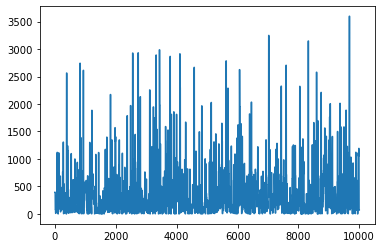

In [281]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.linear1 = nn.Linear(2, 30)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(30, 30)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(30, 6)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(6, 2)
        self.relu4 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        return out + x

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)

model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=1e-6, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()
model.load_model("model_10_10_simple_2")

num_epochs = 1000
list_of_loss = []
counter = 1
for epoch in range(0, num_epochs):
    init_1 = random.choices(population=np.linspace(-5, 5, 100), k=2)
    init_2 = random.choices(population=np.linspace(-5, 5, 100), k=2)
    init_1 = torch.FloatTensor(init_1)
    init_2 = torch.FloatTensor(init_2)
    init_values = torch.transpose(torch.stack((init_1, init_2)), 0, 1).tolist()
    print("="*80)
    label_list = []
    for init_value in init_values:
        y0 = np.array(init_value)
        t = np.linspace(0, 2, 20)
        label = rungekutta4(diff_eqs_example2_rk4, y0, t)
        label_list.append(label)
        x = torch.FloatTensor(label_list[:-1])
        y = torch.FloatTensor(label_list[1:])
#     print(x.size())
#     linear = nn.Linear(2, 6)
#     print(linear(x).size())
#     relu = nn.ReLU()
#     print(relu(linear(x)).size())
    for i in range(0, 10):
        output = model(x)
        loss = criterion(output, y)
        list_of_loss.append(loss.item())
        model.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        print("-"*80)
        print(lambda1)
        print("This is the <", counter,"> times of training.")
        print("The current loss value: ", list_of_loss[counter-1])
        print("The current learning rate: ", get_lr(optimizer))
        counter += 1
print(list_of_loss)
px = list(range(0, len(list_of_loss)))
plt.plot(px, list_of_loss)
model.save_model("model_10_10_simple_2")

torch.Size([1, 20, 2])
[[0.0, -0.3280566334724426, -0.6855980753898621, -1.0805622339248657, -1.5217180252075195, -2.018859624862671, -2.583024263381958, -3.2267372608184814, -3.964289903640747, -4.812057018280029, -5.78886079788208, -6.916386604309082, -8.2196683883667, -9.727639198303223, -11.473780632019043, -13.496856689453125, -15.841785430908203, -18.560625076293945, -21.713741302490234, -25.37113380432129], [-1.0, -0.9165496230125427, -0.8756494522094727, -0.8763913512229919, -0.9187918305397034, -1.0037922859191895, -1.133279800415039, -1.310129165649414, -1.5382667779922485, -1.822757601737976, -2.1699178218841553, -2.5874547958374023, -3.0846383571624756, -3.6725070476531982, -4.36411190032959, -5.174808025360107, -6.122593879699707, -7.228511810302734, -8.517114639282227, -10.017011642456055]]


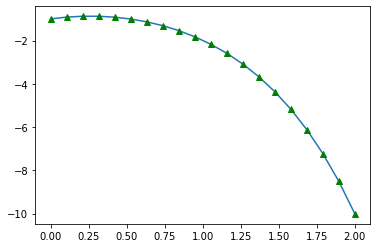

In [286]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.linear1 = nn.Linear(2, 30)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(30, 30)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(30, 6)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(6, 2)
        self.relu4 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        return out + x

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10_simple_2")

t = np.linspace(0, 2, 20)
label_list = []
y0 = np.array([0, -1])
label = rungekutta4(diff_eqs_example2_rk4, y0, t)
label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(t, py1)

print(torch.FloatTensor(label_list).size())
output = model(torch.FloatTensor(label_list))
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(t, py2, 'g^')

torch.Size([1, 20, 2])
[[1.5385409593582153, 1.4905176162719727, 1.451690435409546, 1.4210166931152344, 1.3990479707717896, 1.3854751586914062, 1.3799973726272583, 1.382478952407837, 1.3925721645355225, 1.4125789403915405, 1.4415817260742188, 1.479806900024414, 1.5279608964920044, 1.587274193763733, 1.6591851711273193, 1.7454087734222412, 1.8476821184158325, 1.968276023864746, 2.109867811203003, 2.275601387023926], [0.12689703702926636, 0.2754644453525543, 0.40596804022789, 0.5205265283584595, 0.6210547089576721, 0.7100598812103271, 0.7895180583000183, 0.8611835837364197, 0.926047682762146, 0.9854832291603088, 1.041440486907959, 1.095353603363037, 1.148520827293396, 1.2019855976104736, 1.2570158243179321, 1.314917802810669, 1.376850962638855, 1.4441897869110107, 1.5184295177459717, 1.601218581199646]]


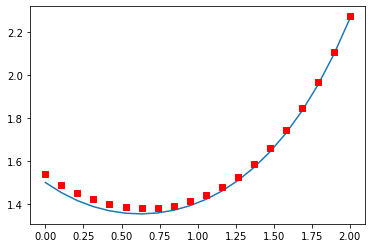

In [274]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.linear1 = nn.Linear(2, 30)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(30, 30)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(30, 6)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(6, 2)
        self.relu4 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        return out + x

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10_simple_2")

t = np.linspace(0, 2, 20)
label_list = []
y0 = np.array([1.5, 0])
label = rungekutta4(diff_eqs_example2_rk4, y0, t)
label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(t, px1)

print(torch.FloatTensor(label_list).size())
output = model(torch.FloatTensor(label_list))
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(t, px2, 'rs')

torch.Size([1, 20, 2])
[[1.5, 1.4527244567871094, 1.4154999256134033, 1.3875001668930054, 1.3681035041809082, 1.3568792343139648, 1.3535782098770142, 1.3581271171569824, 1.3706269264221191, 1.391355276107788, 1.4207721948623657, 1.4595308303833008, 1.50849187374115, 1.568742036819458, 1.641619086265564, 1.72874116897583, 1.8320422172546387, 1.9538158178329468, 2.0967655181884766, 2.2640652656555176], [0.0, 0.1473771184682846, 0.27582481503486633, 0.3881947696208954, 0.4869818091392517, 0.5743791460990906, 0.6523270606994629, 0.7225561738014221, 0.7866256237030029, 0.84595787525177, 0.9018701910972595, 0.955603837966919, 1.0083519220352173, 1.061285376548767, 1.1155794858932495, 1.1724395751953125, 1.2331281900405884, 1.2989925146102905, 1.3714948892593384, 1.4522449970245361]]
ResNet(
  (linear1): Linear(in_features=2, out_features=30, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=30, out_features=30, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=30, out_f

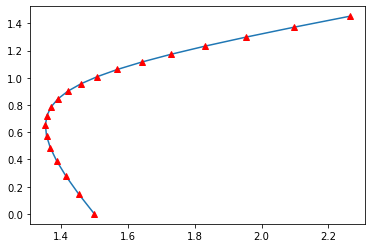

In [285]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.linear1 = nn.Linear(2, 30)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(30, 30)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(30, 6)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(6, 2)
        self.relu4 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        return out + x

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)
        
model = ResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0, amsgrad=False)
criterion = nn.MSELoss()
model.train()

model.load_model("model_10_10_simple_2")

t = np.linspace(0, 2, 20)
label_list = []
y0 = np.array([1.5, 0])
label = rungekutta4(diff_eqs_example2_rk4, y0, t)
label_list.append(label)
label_list_new = torch.transpose(torch.FloatTensor(label_list[0]), 0, 1).tolist()
px1 = label_list_new[0]
py1 = label_list_new[1]
plt.plot(px1, py1)

print(torch.FloatTensor(label_list).size())
output = model(torch.FloatTensor(label_list))
output = output.squeeze()
output_list = torch.transpose(output, 0, 1).tolist()
print(output_list)
px2 = output_list[0]
py2 = output_list[1]
plt.plot(px2, py2, 'r^')

print(model)